In [1]:
import pandas as pd
import numpy as np
from google.colab import drive
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import json
from scipy.spatial import distance
import math
import random
from IPython.display import display, HTML

plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'STIXGeneral'

## **Setting Up**

In [2]:
df_2030 = pd.read_csv('2030_Stations_and_Coordinates.csv')
df_2030["Station"] = df_2030["Station"].str.replace(" ", "_")
df_2030 = df_2030.dropna(subset=['Station'])
df_2030.loc[df_2030['Traffic'].notna(), 'Traffic'] = df_2030.loc[df_2030['Traffic'].notna(), 'Traffic'].astype(int)

display(df_2030)

,ID,Station,Traffic,Latitude,Longitude,First Line,Second Line,Third Line,Fourth Line,Fifth Line
0,1.0,GARE_DU_NORD,34503097.0,48.880556,2.355000,4,5,NaN,NaN,NaN
1,2.0,SAINT-LAZARE,33128384.0,48.875490,2.326640,3,9,12,13,14.0
2,3.0,GARE_DE_LYON,28640475.0,48.844722,2.373889,1,14,A,NaN,NaN
3,4.0,MONTPARNASSE-BIENVENUE,20407224.0,48.843466,2.323072,4,6,12,13,NaN
4,5.0,GARE_DE_L'EST,15538471.0,48.876111,2.358333,4,5,7,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
363,364.0,PALAISEAU,NaN,48.717388,2.245835,18,NaN,NaN,NaN,NaN
364,365.0,MASSY-PALAISEAU,NaN,48.724722,2.258333,18,NaN,NaN,NaN,NaN
365,366.0,MASSY_OPERA,NaN,48.731402,2.290821,18,NaN,NaN,NaN,NaN
366,367.0,ANTONYPOLE,NaN,48.733904,2.313677,18,NaN,NaN,NaN,NaN


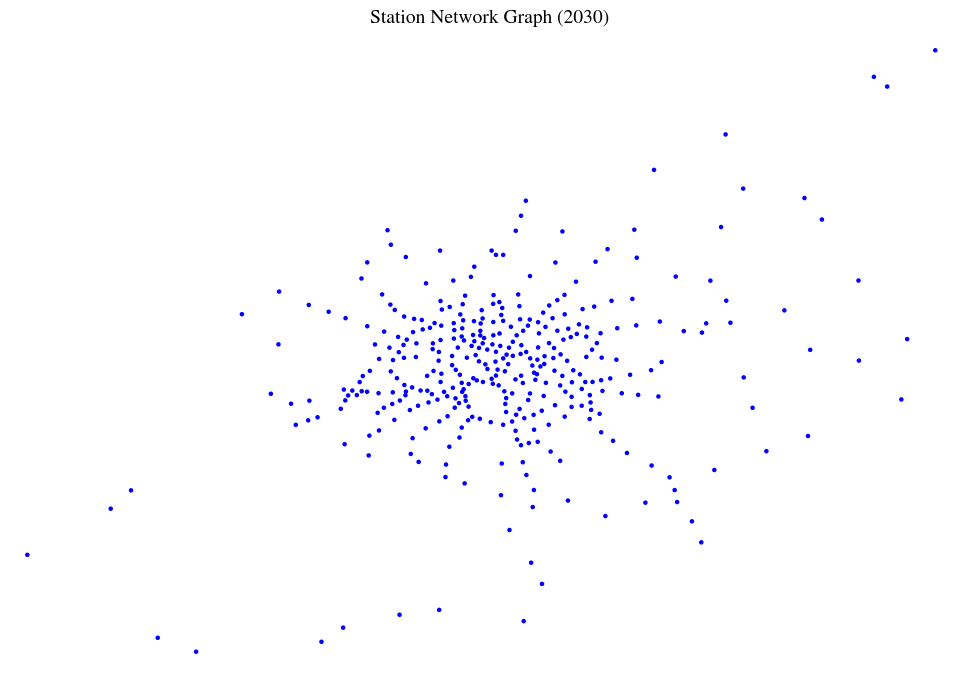

In [3]:
# Create a graph object
graph1 = nx.Graph()
for index, row in df_2030.iterrows():
    graph1.add_node(row['Station'], weight=0)

# Create a dictionary where keys are station names and values are (latitude, longitude) tuples
pos_geo = {}
for index, row in df_2030.iterrows():
    pos_geo[row['Station']] = (row['Longitude'], row['Latitude'])

plt.figure(figsize=(12, 8))  # Adjust the size as needed
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)

# Extract longitude and latitude values from df1 to lists
longitude = df_2030['Longitude'].tolist()
latitude = df_2030['Latitude'].tolist()

plt.xlim([min(longitude) - 0.01, max(longitude) + 0.02])
plt.ylim([min(latitude) - 0.01 , max(latitude) + 0.01])

# Array of colors
node_colors = ['blue'] * len(graph1.nodes())  # Initialize all to blue

# Draw the graph with the updated node colors:
nx.draw(graph1, pos_geo, node_color=node_colors, node_size = 5, font_family = 'STIXGeneral')

plt.title("Station Network Graph (2030)", fontsize=14)

plt.show()  # Display the visualization

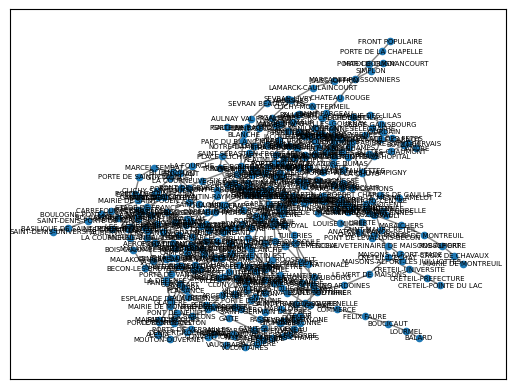

368

In [4]:
# Create a graph object
graph_all_lines = nx.Graph()

Line1_Stations_Ordered = ["LA DEFENSE", "ESPLANADE DE LA DEFENSE", "PONT DE NEUILLY", "LES SABLONS", "PORTE MAILLOT",
"ARGENTINE", "CHARLES DE GAULLE-ETOILE", "GEORGE V", "FRANKLIN D. ROOSEVELT", "CHAMPS-ELYSEES-CLEMENCEAU",
"CONCORDE", "TUILERIES", "PALAIS-ROYAL", "LOUVRE", "CHATELET", "HOTEL DE VILLE", "SAINT-PAUL", "BASTILLE",
"GARE DE LYON", "REUILLY-DIDEROT", "NATION", "PORTE DE VINCENNES", "SAINT-MANDE-TOURELLE",
"BERAULT", "CHATEAU DE VINCENNES", "VAL DE-FONTENAY"]

Line2_Stations_Ordered = ["PORTE DAUPHINE", "VICTOR HUGO", "CHARLES DE GAULLE-ETOILE", "TERNES", "COURCELLES",
"MONCEAU", "VILLIERS", "ROME", "PLACE CLICHY", "BLANCHE", "PIGALLE", "ANVERS", "BARBES-ROCHECHOUART",
"LA CHAPELLE", "STALINGRAD", "JAURES", "COLONEL FABIEN", "BELLEVILLE", "COURONNES", "MENILMONTANT",
"PERE LACHAISE", "PHILIPPE AUGUSTE", "ALEXANDRE DUMAS", "AVRON", "NATION"]

Line3_Stations_Ordered = ["PONT DE LEVALLOIS-BECON", "ANATOLE FRANCE", "LOUISE MICHEL", "PORTE DE CHAMPERRET",
"PEREIRE", "WAGRAM", "MALESHERBES", "VILLIERS", "EUROPE", "SAINT-LAZARE", "HAVRE-CAUMARTIN", "OPERA",
"QUATRE-SEPTEMBRE", "BOURSE", "SENTIER", "REAUMUR-SEBASTOPOL", "ARTS ET METIERS", "TEMPLE", "REPUBLIQUE",
"PARMENTIER", "SAINT-MAUR", "PERE LACHAISE", "GAMBETTA", "PORTE DE BAGNOLET", "GALLIENI"]

Line3bis_Stations_Ordered = ["PORTE DES LILAS", "SAINT-FARGEAU", "PELLEPORT", "GAMBETTA"]

Line4_Stations_Ordered = ["PORTE DE CLIGNANCOURT", "SIMPLON", "MARCADET-POISSONNIERS", "CHATEAU ROUGE",
"BARBES-ROCHECHOUART", "GARE DU NORD", "GARE DE L'EST", "CHATEAU D'EAU", "STRASBOURG-SAINT-DENIS",
"REAUMUR-SEBASTOPOL", "ETIENNE MARCEL", "LES HALLES", "CHATELET", "CITE", "SAINT-MICHEL", "ODEON",
"SAINT-GERMAIN DES PRES", "SAINT-SULPICE", "SAINT-PLACIDE", "MONTPARNASSE-BIENVENUE", "VAVIN", "RASPAIL",
"DENFERT-ROCHEREAU", "MOUTON-DUVERNET", "ALESIA", "PORTE D'ORLEANS", "MAIRIE DE MONTROUGE", "BARBARA", "BAGNEUX"]

Line5_Stations_Ordered = ["BOBIGNY-PABLO PICASSO", "BOBIGNY-PANTIN-RAYMOND QUENEAU", "EGLISE DE PANTIN", "HOCHE",
"PORTE DE PANTIN", "OURCQ", "LAUMIERE", "JAURES", "STALINGRAD", "GARE DU NORD", "GARE DE L'EST", "JACQUES BONSERGENT",
"REPUBLIQUE", "OBERKAMPF", "RICHARD LENOIR", "BREGUET-SABIN", "BASTILLE", "QUAI DE LA RAPEE", "GARE D'AUSTERLITZ",
"SAINT-MARCEL", "CAMPO-FORMIO", "PLACE D'ITALIE"]

Line6_Stations_Ordered = ["CHARLES DE GAULLE-ETOILE", "KLEBER", "BOISSIERE", "TROCADERO", "PASSY", "BIR-HAKEIM",
"DUPLEIX", "LA MOTTE-PICQUET-GRENELLE", "CAMBRONNE", "SEVRES-LECOURBE", "PASTEUR", "MONTPARNASSE-BIENVENUE",
"EDGAR QUINET", "RASPAIL", "DENFERT-ROCHEREAU", "SAINT-JACQUES", "GLACIERE", "CORVISART", "PLACE D'ITALIE",
"NATIONALE", "CHEVALERET", "QUAI DE LA GARE", "BERCY", "DUGOMMIER", "DAUMESNIL", "BEL AIR", "PICPUS", "NATION"]

Line7_Stations_Ordered = ["LA COURNEUVE-8 MAI 1945", "FORT D'AUBERVILLIERS", "AUBERVILLIERS-PANTIN-QUATRE CHEMINS",
"PORTE DE LA VILLETTE", "CORENTIN CARIOU", "CRIMEE", "RIQUET", "STALINGRAD", "LOUIS BLANC", "CHATEAU-LANDON",
"GARE DE L'EST", "POISSONNIERE", "CADET", "LE PELETIER", "CHAUSSEE D'ANTIN-LA FAYETTE", "OPERA", "PYRAMIDES",
"PALAIS-ROYAL", "PONT NEUF", "CHATELET", "PONT MARIE", "SULLY-MORLAND", "JUSSIEU", "PLACE MONGE",
"CENSIER-DAUBENTON", "LES GOBELINS", "PLACE D'ITALIE", "TOLBIAC", "MAISON BLANCHE", "PORTE D'ITALIE", "PORTE DE CHOISY",
"PORTE D'IVRY", "PIERRE CURIE", "MAIRIE D'IVRY"]

Line7_Extra_Stations_Ordered = ["LE KREMLIN-BICETRE", "VILLEJUIF-LEO LAGRANGE", "VILLEJUIF-PAUL VAILLANT-COUTURIER", "VILLEJUIF-LOUIS ARAGON"]

Line7bis_Stations_Ordered = ["LOUIS BLANC", "JAURES", "BOLIVAR", "BUTTES-CHAUMONT", "BOTZARIS", "PLACE DES FETES",
"PRE-SAINT-GERVAIS", "DANUBE", "BOTZARIS"]

Line8_Stations_Ordered = ["BALARD", "LOURMEL", "BOUCICAUT", "FELIX FAURE", "COMMERCE", "LA MOTTE-PICQUET-GRENELLE",
"ECOLE MILITAIRE", "LA TOUR-MAUBOURG", "INVALIDES", "CONCORDE", "MADELEINE", "OPERA", "RICHELIEU-DROUOT",
"GRANDS BOULEVARDS", "BONNE NOUVELLE", "STRASBOURG-SAINT-DENIS", "REPUBLIQUE", "FILLES DU CALVAIRE",
"SAINT-SEBASTIEN-FROISSART", "CHEMIN VERT", "BASTILLE", "LEDRU-ROLLIN", "FAIDHERBE-CHALIGNY", "REUILLY-DIDEROT",
"MONTGALLET", "DAUMESNIL", "MICHEL BIZOT", "PORTE DOREE", "PORTE DE CHARENTON", "LIBERTE", "CHARENTON-ECOLES",
"ECOLE VETERINAIRE DE MAISONS-ALFORT", "MAISONS-ALFORT-STADE", "MAISONS-ALFORT-LES JUILLIOTTES",
"CRETEIL-L'ECHAT", "CRETEIL-UNIVERSITE", "CRETEIL-PREFECTURE", "CRETEIL-POINTE DU LAC"]

Line9_Stations_Ordered = ["PONT DE SEVRES", "BILLANCOURT", "MARCEL SEMBAT", "PORTE DE SAINT-CLOUD", "EXELMANS",
"MICHEL-ANGE-MOLITOR", "MICHEL-ANGE-AUTEUIL", "JASMIN", "RANELAGH", "LA MUETTE", "RUE DE LA POMPE", "TROCADERO",
"IENA", "ALMA-MARCEAU", "FRANKLIN D. ROOSEVELT", "SAINT-PHILIPPE-DU-ROULE", "MIROMESNIL", "SAINT-AUGUSTIN",
"HAVRE-CAUMARTIN", "CHAUSSEE D'ANTIN-LA FAYETTE", "RICHELIEU-DROUOT", "GRANDS BOULEVARDS", "BONNE NOUVELLE",
"STRASBOURG-SAINT-DENIS", "REPUBLIQUE", "OBERKAMPF", "SAINT-AMBROISE", "VOLTAIRE", "CHARONNE",
"RUE DES BOULETS", "NATION", "BUZENVAL", "MARAICHERS", "PORTE DE MONTREUIL", "ROBESPIERRE", "CROIX DE CHAVAUX",
"MAIRIE DE MONTREUIL"]

Line10_Stations_Ordered = ["BOULOGNE-PONT DE SAINT-CLOUD", "BOULOGNE-JEAN JAURES", "PORTE D'AUTEUIL", "MICHEL-ANGE-AUTEUIL",
"EGLISE D'AUTEUIL", "JAVEL-ANDRE CITROEN", "CHARLES MICHELS", "AVENUE EMILE ZOLA", "LA MOTTE-PICQUET-GRENELLE", "SEGUR",
"DUROC", "VANEAU", "SEVRES-BABYLONE", "MABILLON", "ODEON", "CLUNY LA SORBONNE", "MAUBERT-MUTUALITE", "CARDINAL LEMOINE", "JUSSIEU", "GARE D'AUSTERLITZ"]

Line10_Extra_Stations_Ordered = ["MICHEL-ANGE-MOLITOR", "CHARDON-LAGACHE", "MIRABEAU"]

Line11_Stations_Ordered = ["CHATELET", "HOTEL DE VILLE", "RAMBUTEAU", "ARTS ET METIERS", "REPUBLIQUE", "GONCOURT",
"BELLEVILLE", "PYRENEES", "JOURDAIN", "PLACE DES FETES", "TELEGRAPHE", "PORTE DES LILAS", "MAIRIE DES LILAS", "SERGE GAINSBOURG",
"ROMAINVILLE-CARNOT", "MONTREUIL-HOPITAL", "LA DHUYS", "COTEAUX BEAUCLAIR", "ROSNY-BOIS-PERRIER", "VILLEMOMBLE",
"NEUILLY-LES FAUVETTES", "NEUILLY-HOPITAUX", "NOISY-CHAMPS"]

Line12_Stations_Ordered = ["FRONT POPULAIRE", "PORTE DE LA CHAPELLE", "MARX DORMOY", "MARCADET-POISSONNIERS",
"JULES JOFFRIN", "LAMARCK-CAULAINCOURT", "ABBESSES", "PIGALLE", "SAINT-GEORGES", "NOTRE-DAME-DE-LORETTE", "TRINITE-D'ESTIENNE D'ORVES",
"SAINT-LAZARE", "MADELEINE", "CONCORDE", "ASSEMBLEE NATIONALE", "SOLFERINO", "RUE DU BAC", "SEVRES-BABYLONE",
"RENNES", "NOTRE-DAME-DES-CHAMPS", "MONTPARNASSE-BIENVENUE", "FALGUIERE", "PASTEUR", "VOLONTAIRES", "VAUGIRARD",
"CONVENTION", "PORTE DE VERSAILLES", "CORENTIN CELTON", "MAIRIE D'ISSY"]

Line13_Stations_Ordered = ["SAINT-DENIS-UNIVERSITE", "BASILIQUE DE SAINT-DENIS", "SAINT-DENIS-PORTE DE PARIS", "CARREFOUR PLEYEL",
"MAIRIE DE SAINT-OUEN", "GARIBALDI", "PORTE DE SAINT-OUEN", "GUY MOQUET", "LA FOURCHE", "PLACE CLICHY", "LIEGE", "SAINT-LAZARE",
"MIROMESNIL", "CHAMPS-ELYSEES-CLEMENCEAU", "INVALIDES", "VARENNE", "SAINT-FRANCOIS-XAVIER", "DUROC", "MONTPARNASSE-BIENVENUE",
"GAITE", "PERNETY", "PLAISANCE", "PORTE DE VANVES", "MALAKOFF-PLATEAU DE VANVES", "MALAKOFF-RUE ETIENNE DOLET", "CHATILLON-MONTROUGE"]

Line13_Extra_Stations_Ordered = ["LES COURTILLES", "LES AGNETTES", "GABRIEL PERI", "MAIRIE DE CLICHY", "PORTE DE CLICHY", "BROCHANT"]

Line14_Stations_Ordered = ["SAINT-DENIS-PLEYEL", "MAIRIE DE SAINT-OUEN", "CLICHY SAINT-OUEN", "PORTE DE CLICHY", "PONT CARDINET", "SAINT-LAZARE",
"MADELEINE", "PYRAMIDES", "CHATELET", "GARE DE LYON", "BERCY", "COUR SAINT-EMILION", "BIBLIOTHEQUE", "OLYMPIADES", "MAISON BLANCHE", "HOPITAL BICETRE",
"VILLEJUIF-GUSTAVE ROUSSY", "L'HAY-LES-ROSES", "CHEVILLY-LARUE", "THIAIS-ORLY", "AEROPORT D'ORLY"]

Line15_Stations_Ordered = ["NOISY-CHAMPS", "BRY-VILLIERS-CHAMPIGNY", "CHAMPIGNY-CENTRE", "SAINT-MAUR-CRETEIL", "CRETEIL-L'ECHAT",
"LE VERT DE MAISONS", "LES ARDOINES", "VITRY-CENTRE", "VILLEJUIF-LOUIS ARAGON", "VILLEJUIF-GUSTAVE ROUSSY", "ARCUEIL-CACHAN", "BAGNEUX",
"CHATILLON-MONTROUGE", "CLAMART", "ISSY", "PONT DE SEVRES", "SAINT-CLOUD", "RUEIL-SURESNES MONT VALERIEN", "NANTERRE-LA BOULE", "NANTERRE-LA FOLIE",
"LA DEFENSE", "BECON-LES-BRUYERES", "BOIS-COLOMBES", "LES AGNETTES", "LES GRESILLONS", "SAINT-DENIS-PLEYEL", "STADE DE FRANCE",
"MAIRIE D'AUBERVILLIERS", "FORT D'AUBERVILLIERS", "BOBIGNY-DRANCY", "BOBIGNY-PABLO PICASSO", "PONT DE BONDY", "BONDY", "ROSNY-BOIS-PERRIER",
"VAL DE-FONTENAY", "LE PERREUX-NOGENT"]

Line16_Stations_Ordered = ["NOISY-CHAMPS", "CHELLES-GOURNAY", "CLICHY-MONTFERMEIL", "SEVRAN-LIVRY", "SEVRAN BEAUDOTTES", "AULNAY VAL FRANCILIA",
"PARC DU BLANC-MESNIL", "LE BOURGET", "LA COURNEUVE-SIX ROUTES", "SAINT-DENIS-PLEYEL"]

Line17_Stations_Ordered = ["LE MESNIL-AMELOT", "AEROPORT CHARLES DE GAULLE T2", "PARC DES EXPOSITIONS",
"TRIANGLE DE GONESSE", "LE BOURGET AEROPORT", "LE BOURGET", "LA COURNEUVE-SIX ROUTES", "SAINT-DENIS-PLEYEL" ]

Line18_Stations_Ordered = ["VERSAILLES CHANTIERS", "SATORY", "SAINT-QUENTIN EST", "CEA SAINT-AUBIN", "ORSAY-GIF", "PALAISEAU","MASSY-PALAISEAU",
"MASSY OPERA", "ANTONYPOLE", "AEROPORT D'ORLY"]

for line in {1, 2, 3, 3.5, 4, 5, 6, 7, 7.5, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18}:
  for index, row in df_2030.iterrows():
    # Check if the station belongs to the current line
    if row['First Line'] == line  or row['Second Line'] == line or row['Third Line'] == line or row['Fourth Line'] == line or row['Fifth Line'] == line:
        # Add the station as a node to the graph
        graph_all_lines.add_node(row['Station'], weight=row['Traffic'])

for line in {1, 2, 3, 3.5, 4, 5, 6, 7, 7.5, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18}:
    # Determine which station ordering to use
    if line == 1:
      station_ordering = Line1_Stations_Ordered
    elif line == 2:
      station_ordering = Line2_Stations_Ordered
    elif line == 3:
      station_ordering = Line3_Stations_Ordered
    elif line == 3.5:
      station_ordering = Line3bis_Stations_Ordered
    elif line == 4:
      station_ordering = Line4_Stations_Ordered
    elif line == 5:
      station_ordering = Line5_Stations_Ordered
    elif line == 6:
      station_ordering = Line6_Stations_Ordered
    elif line == 7:
      station_ordering = Line7_Stations_Ordered
    elif line == 7.5:
      station_ordering = Line7bis_Stations_Ordered
    elif line == 8:
      station_ordering = Line8_Stations_Ordered
    elif line == 9:
      station_ordering = Line9_Stations_Ordered
    elif line == 10:
      station_ordering = Line10_Stations_Ordered
    elif line == 11:
      station_ordering = Line11_Stations_Ordered
    elif line == 12:
      station_ordering = Line12_Stations_Ordered
    elif line == 13:
      station_ordering = Line13_Stations_Ordered
    elif line == 14:
      station_ordering = Line14_Stations_Ordered
    elif line == 15:
      station_ordering = Line15_Stations_Ordered
    elif line == 16:
      station_ordering = Line16_Stations_Ordered
    elif line == 17:
      station_ordering = Line17_Stations_Ordered
    else:
      station_ordering = Line18_Stations_Ordered

    # Add edges for the current line
    for i in range(len(station_ordering) - 1):
      # Get the current and next station in the order
      station1 = station_ordering[i]
      station2 = station_ordering[i + 1]
      # Add an edge between the two stations
      graph_all_lines.add_edge(station1, station2, label=line)

# add additional nodes and edges related to line 7
for i, node in enumerate(Line7_Extra_Stations_Ordered):
  graph_all_lines.add_node(node)
  if i >= 1:
    graph_all_lines.add_edge(Line7_Extra_Stations_Ordered[i-1], node, label=7)
graph_all_lines.add_edge("MAISON BLANCHE", "LE KREMLIN-BICETRE", label=7)

# add additional nodes and edges related to line 10
for i, node in enumerate(Line10_Extra_Stations_Ordered):
  graph_all_lines.add_node(node)
  if i >= 1:
    graph_all_lines.add_edge(Line10_Extra_Stations_Ordered[i-1], node, label=10)
graph_all_lines.add_edge("BOULOGNE-JEAN JAURES", "MICHEL-ANGE-MOLITOR", label=10)
graph_all_lines.add_edge("MIRABEAU", "JAVEL-ANDRE CITROEN", label=10)

# add additional nodes and edges related to line 13
for i, node in enumerate(Line13_Extra_Stations_Ordered):
  graph_all_lines.add_node(node)
  if i >= 1:
    graph_all_lines.add_edge(Line13_Extra_Stations_Ordered[i-1], node, label=13)
graph_all_lines.add_edge("BROCHANT", "LA FOURCHE", label=13)

# add an additional edge related to line 15
graph_all_lines.add_edge("LE PERREUX-NOGENT", "CHAMPIGNY-CENTRE", label=15)

# Create a dictionary of labels for the nodes where the keys are node names
# and values are the labels you want displayed (e.g., 'Name of the Station').
labels = {node: node for node in graph_all_lines.nodes()}

# Define node positions (you can customize this)
pos = nx.spring_layout(graph_all_lines)

# Create a dictionary of weights for the nodes where the keys are the station names and the values are the traffic amounts
weight_dict = df_2030.set_index('Station')['Traffic'].to_dict()

# Now you can draw the nodes and edges
# node_sizes = [graph_all_lines.nodes[node].get('weight', 1) * 0.001 for node in graph_all_lines.nodes]
nx.draw_networkx_nodes(graph_all_lines, pos, node_size = 20) # Use the updated node_sizes list
nx.draw_networkx_edges(graph_all_lines, pos, edge_color='gray')
nx.draw_networkx_labels(graph_all_lines,pos, labels, font_size=5) # draw labels separately

plt.show()  # Display the visualization
graph_all_lines.number_of_nodes()

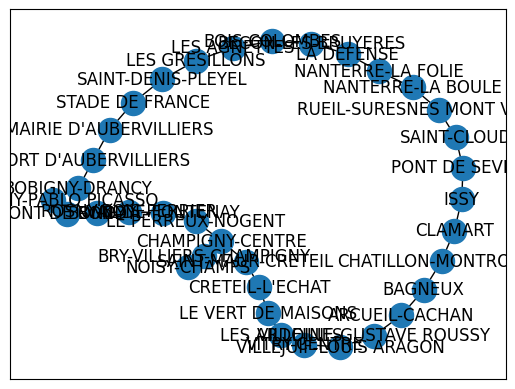

In [5]:
# Testing out a particular line
line_15_graph = nx.Graph()
line_15_edges = [e for e in graph_all_lines.edges() if graph_all_lines.get_edge_data(e[0], e[1])['label'] == 15]
line_15_graph.add_edges_from(line_15_edges)

nx.draw_networkx(line_15_graph)
plt.show()

In [6]:
# Fix the format of each station

name_mapping = {}

for node in graph_all_lines.nodes():
  name_mapping[node] = node.replace(" ", "_")

nx.relabel_nodes(graph_all_lines, name_mapping, copy=False)

# Download the graph

nx.write_edgelist(graph_all_lines, "2030_graph_all_lines.txt")

## **Timing**

In [7]:
df_time_between_stops = pd.read_csv("2030 Time Between Stops By Line.csv")
display(df_time_between_stops)

# Create a dictionary mapping line numbers to travel times
line_to_time = dict(zip(df_time_between_stops["Line"], df_time_between_stops["Time Between Stops (mins)"]))

,Line,Time Between Stops (mins)
0,1.0,1.500
1,2.0,1.375
2,3.0,1.292
3,3.5,1.000
4,4.0,1.250
5,5.0,1.619
6,6.0,1.269
7,7.0,1.424
8,7.5,1.000
9,8.0,1.378


## **Priority Stations**

In [8]:
df_priority_stations = pd.read_csv("2030 Priority Stations.csv")
df_priority_stations["Priority Stations"] = df_priority_stations["Priority Stations"].str.replace(" ", "_")
priority_station_names = df_priority_stations["Priority Stations"].tolist()

display(df_priority_stations)

,Priority Stations,Built before 2021,2030 Predicted Traffic
0,ARCUEIL-CACHAN,N,2830821.0
1,AUBERVILLIERS-PANTIN-QUATRE_CHEMINS,Y,NaN
2,AULNAY_VAL_FRANCILIA,N,11182953.0
3,BAGNEUX,N,1439585.0
4,BARBARA,N,26563097.0
...,...,...,...
88,VILLEJUIF-GUSTAVE_ROUSSY,N,1043071.0
89,VILLEJUIF-LEO_LAGRANGE,Y,NaN
90,VILLEJUIF-LOUIS_ARAGON,Y,NaN
91,VILLEMOMBLE,N,11182953.0


## **Read in the graph and the data frame**

Unique Metro Lines: {1, 2, 3, 4, 5, 6, 7, 8, 9, 7.5, 11, 12, 13, 14, 10, 3.5, 15, 16, 17, 18}


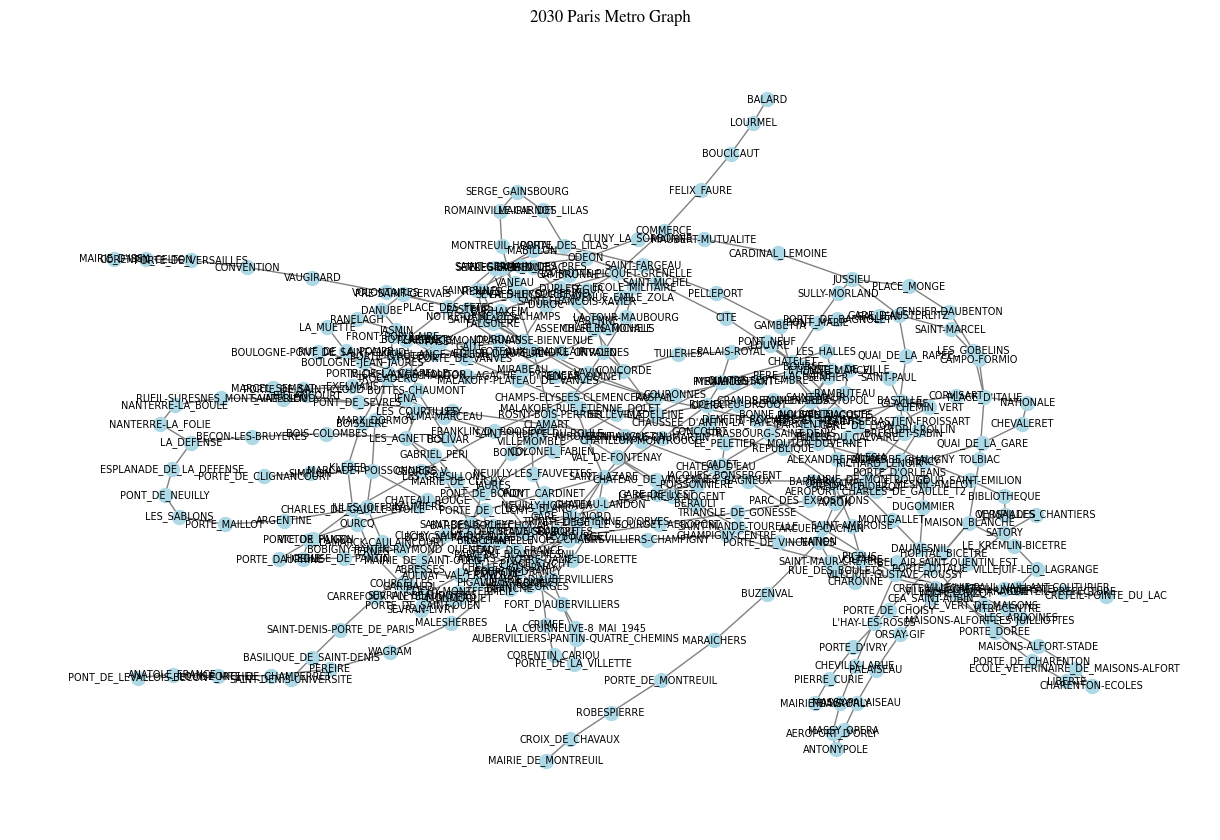

# of edges: 442


In [9]:
# Initialize an empty graph
G = nx.Graph()

# Initialize an empty set to store metro lines
metro_lines = set()

# Read the graph file manually and parse edges
with open("2030_graph_all_lines.txt", "r", encoding="utf-8") as file:
    for line in file:
        parts = line.strip().split(" ", 2)  # Split into first two parts + label dictionary
        if len(parts) == 3:
            node1, node2, attr_str = parts
            try:
                # Convert the attribute string into a dictionary
                attr_dict = eval(attr_str)  # Be cautious with eval() if the file is untrusted

                G.add_edge(node1, node2, **attr_dict)
            except SyntaxError:
                print(f"Skipping invalid line: {line.strip()}")

# Add traversal time as an edge attribute based on the line number
for u, v, data in G.edges(data=True):
    line = data.get("label")
    if line in line_to_time:
        G[u][v]["time"] = line_to_time[line]  # Assign travel time

# Extract all unique Metro lines from edge attributes
for edge in G.edges(data=True):
    line = edge[2].get("label")
    if line:
        metro_lines.add(line)

print(f"Unique Metro Lines: {metro_lines}")  # Print to check

# Draw the graph
plt.figure(figsize=(12, 8))
nx.draw(G, with_labels=True, node_color="lightblue", edge_color="gray", node_size=100, font_size=7)
plt.title("2030 Paris Metro Graph")
plt.show()
print("# of edges:", G.number_of_edges())

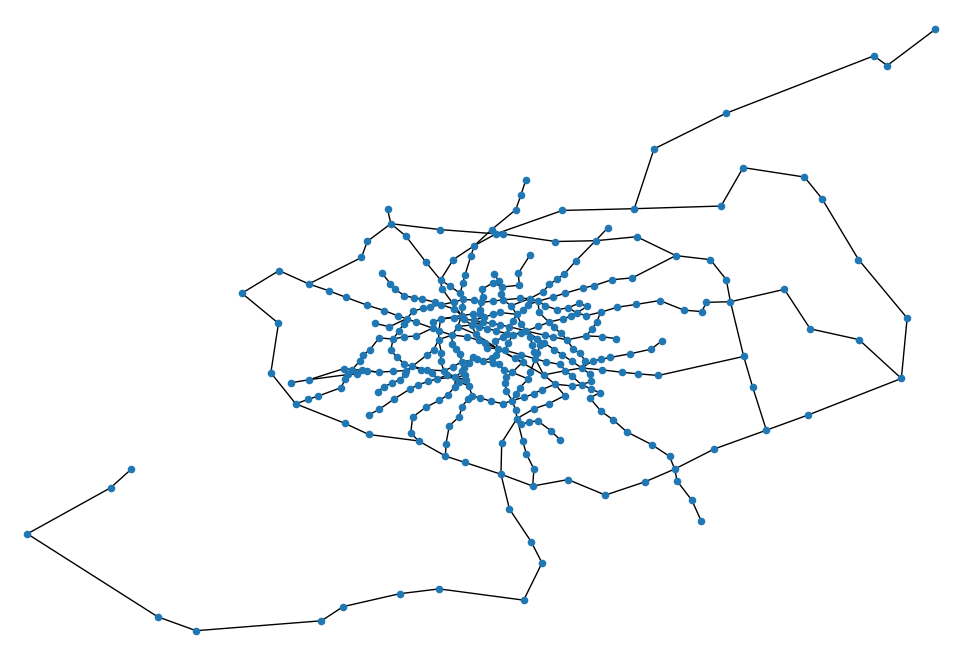

# of stations: 368


In [10]:
# Create a dictionary where keys are station names and values are (latitude, longitude) tuples
station_coordinates = {}
for index, row in df_2030.iterrows():
    station_coordinates[row['Station']] = (row['Longitude'], row['Latitude'])

plt.figure(figsize=(12, 8))  # Adjust the size as needed
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)

# Extract longitude and latitude values from df1 to lists
longitude = df_2030['Longitude'].tolist()
latitude = df_2030['Latitude'].tolist()

plt.xlim([min(longitude) - 0.01, max(longitude) + 0.02])
plt.ylim([min(latitude) - 0.01 , max(latitude) + 0.01])
nx.draw(G, station_coordinates, node_size = 20)
plt.show()  # Display the visualization

print("# of stations:", G.number_of_nodes())

## **Estimating the Traffic of the 2030 Network and Updating df_2030**

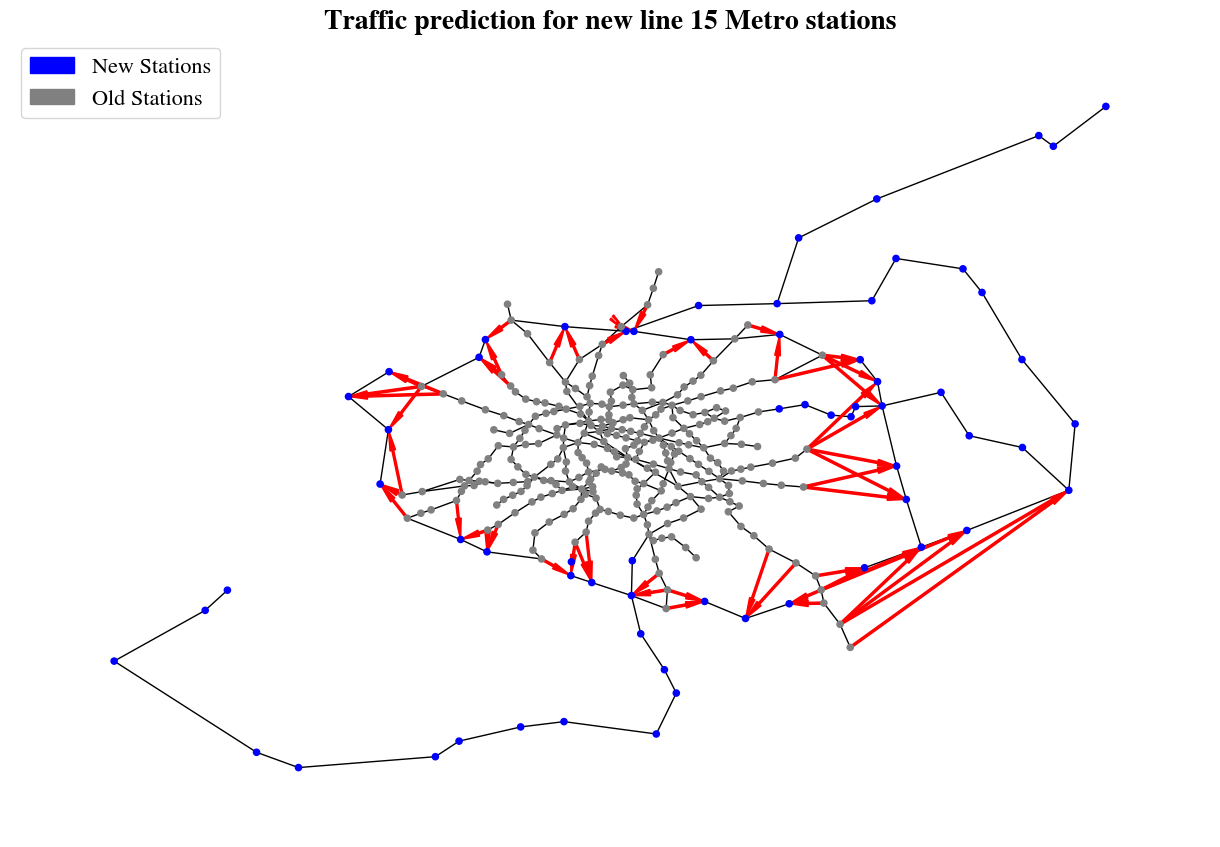

In [13]:
# Classify stations
nan_stations = df_2030[df_2030['Traffic'].isnull()]['Station'].tolist()
new_stations = set(nan_stations)  # Convert to a set for efficient lookup

# Get all stations from df_2030
all_stations = set(df_2030['Station'].tolist())

# Calculate old_stations (all stations that are not new stations)
old_stations = all_stations - new_stations

m = 2  # Number of old stations that each new station is stealing

# Compute distance between new stations and old stations
def find_nearest_old_stations(new_station, m):
    new_coord = station_coordinates[new_station]
    distances = [(old, distance.euclidean(new_coord, station_coordinates[old])) for old in old_stations]
    distances.sort(key=lambda x: x[1])  # Sort by distance
    return [station for station, _ in distances[:m]]

line_15_stations = df_2030[
    df_2030[['First Line', 'Second Line', 'Third Line', 'Fourth Line', 'Fifth Line']].apply(lambda row: any(str(val) == '15' for val in row.values), axis=1)
]['Station'].tolist()

# Visualization
plt.figure(figsize=(12, 8))  # Adjust the size as needed
pos = {station: (coord[0], coord[1]) for station, coord in station_coordinates.items()}
nx.draw(G, pos, with_labels=False, node_color=["blue" if n in new_stations else "gray" for n in G.nodes], edge_color='black', node_size = 20)

for new_station in new_stations:
    if new_station in line_15_stations:
        nearest_old_stations = find_nearest_old_stations(new_station, m)
        for old_station in nearest_old_stations:
          old_coord = station_coordinates[old_station]
          new_coord = station_coordinates[new_station]

          # Draw arrow
          plt.arrow(old_coord[0], old_coord[1],
                          new_coord[0] - old_coord[0], new_coord[1] - old_coord[1],
                          head_width=0.003, head_length=0.01, fc='red', ec='red', length_includes_head=True, width=0.001)

# Create legend elements
blue_patch = mpatches.Patch(color='blue', label='New Stations')
grey_patch = mpatches.Patch(color='grey', label='Old Stations')

# Add the legend to the plot
plt.legend(handles=[blue_patch, grey_patch], fontsize = 16)

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Traffic prediction for new line 15 Metro stations", fontsize=20, fontweight="bold")
plt.savefig("Line_15_Traffic_Prediction.pdf", bbox_inches='tight')

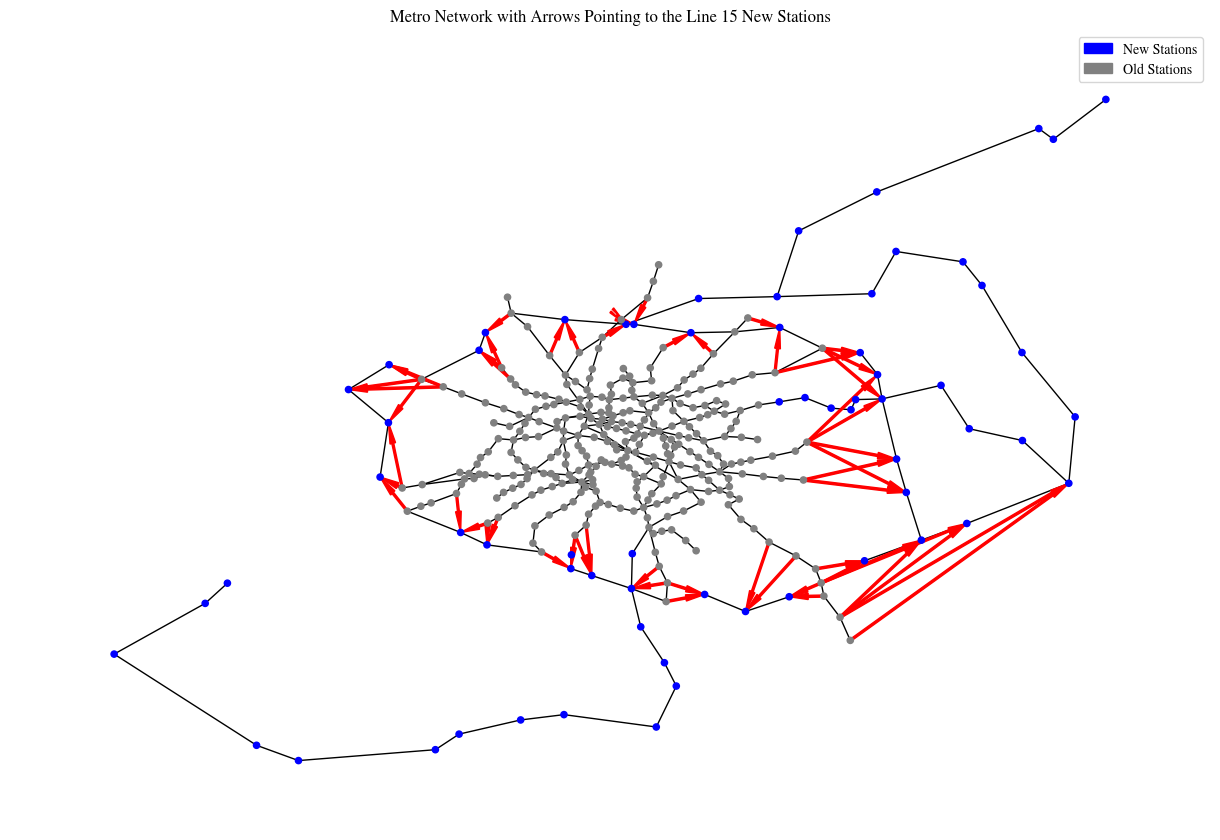

In [12]:
# Create a dictionary to map station names to their traffic values from df_2030
station_traffic = df_2030.set_index('Station')['Traffic'].to_dict()

# Assign traffic values to old nodes only
for node in G.nodes():
    if node in old_stations:  # Check if the node is an old station
        G.nodes[node]['traffic'] = station_traffic[node] # Assign traffic from df_2030

# Compute distance between new stations and old stations
def find_nearest_old_stations(new_station, m):
    new_coord = station_coordinates[new_station]
    distances = [(old, distance.euclidean(new_coord, station_coordinates[old])) for old in old_stations]
    distances.sort(key=lambda x: x[1])  # Sort by distance
    return [station for station, _ in distances[:m]]

# Redistribute traffic from old stations to new stations only in line 15_stations according to the arrows
for new_station in line_15_stations:
    # Find old stations that will point to the new station
    nearest_old_stations = find_nearest_old_stations(new_station, m)

    # Calculate traffic to be redistributed
    traffic_to_redistribute = 0
    for old_station in nearest_old_stations:
        traffic_to_redistribute += G.nodes[old_station]['traffic'] / (m + 1)

    # Redistribute traffic
    G.nodes[new_station]['traffic'] = traffic_to_redistribute
    for old_station in nearest_old_stations:
        G.nodes[old_station]['traffic'] -= G.nodes[old_station]['traffic'] / (m + 1)

# Visualization
plt.figure(figsize=(12, 8))  # Adjust the size as needed
pos = {station: (coord[0], coord[1]) for station, coord in station_coordinates.items()}
nx.draw(G, pos, with_labels=False, node_color=["blue" if n in new_stations else "gray" for n in G.nodes], edge_color='black', node_size = 20)

for new_station in new_stations:
    if new_station in line_15_stations:
        nearest_old_stations = find_nearest_old_stations(new_station, m)
        for old_station in nearest_old_stations:
          old_coord = station_coordinates[old_station]
          new_coord = station_coordinates[new_station]

          # Draw arrow
          plt.arrow(old_coord[0], old_coord[1],
                          new_coord[0] - old_coord[0], new_coord[1] - old_coord[1],
                          head_width=0.003, head_length=0.01, fc='red', ec='red', length_includes_head=True, width=0.001)

def meters_to_degrees(meters, latitude):
  """Converts meters to degrees of latitude at a given latitude."""
  return meters / (111.32 * 1000 * math.cos(math.radians(latitude)))

# Create legend elements
blue_patch = mpatches.Patch(color='blue', label='New Stations')
grey_patch = mpatches.Patch(color='grey', label='Old Stations')

# Add the legend to the plot
plt.legend(handles=[blue_patch, grey_patch])

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Metro Network with Arrows Pointing to the Line 15 New Stations")
plt.show()

In [13]:
# Create a DataFrame for the table

# Create a dictionary to store the original traffic values
original_traffic = df_2030.set_index('Station')['Traffic'].to_dict()

# Create a DataFrame for the table
data = []
for node in G.nodes():
    original = original_traffic[node]  # Get original traffic
    new = G.nodes[node].get('traffic', 0)  # Get redistributed traffic (if available, else 0)
    data.append([node, original, new])

df_traffic_comparison = pd.DataFrame(data, columns=['Station ID', '2021 Traffic', '2030 Traffic'])

# Convert columns to numeric and suppress scientific notation
df_traffic_comparison['2030 Traffic'] = pd.to_numeric(df_traffic_comparison['2030 Traffic']).astype(int)

# Rename "Traffic" column in df_2030 to "2021 Traffic"
df_traffic_comparison.rename(columns={'Station ID': 'Station'}, inplace=True)

# Display the table
display(df_traffic_comparison)

# Download as a CSV file
df_traffic_comparison.to_csv('df_traffic_comparison.csv', index=False)

,Station,2021 Traffic,2030 Traffic
0,REPUBLIQUE,11079708.0,11079708
1,TEMPLE,891858.0,891858
2,PARMENTIER,2037234.0,2037234
3,OBERKAMPF,3205110.0,3205110
4,STRASBOURG-SAINT-DENIS,6345770.0,6345770
...,...,...,...
363,PORTE_DAUPHINE,2021656.0,2021656
364,GEORGE_V,3842260.0,3842260
365,LES_SABLONS,3954920.0,3954920
366,PONT_DE_NEUILLY,4809503.0,4809503


In [14]:
# Rename "Traffic" column in df_2030 to "2021 Traffic"
df_2030.rename(columns={'Traffic': '2021 Traffic'}, inplace=True)

# Merge "2030 Traffic" column from df_traffic_comparison into df_2030
# Assuming both dataframes have a common key, such as "Station" or "ID"
df_2030 = df_2030.merge(df_traffic_comparison[['Station', '2030 Traffic']], on='Station', how='left')

# Reorder columns to place "2030 Traffic" right after "2021 Traffic"
columns_order = ['ID', 'Station', '2021 Traffic', '2030 Traffic'] + [col for col in df_2030.columns if col not in ['ID', 'Station', '2021 Traffic', '2030 Traffic']]
df_2030 = df_2030[columns_order]

# Add 'Station Capacity' column
df_2030["Station Capacity"] = df_2030.apply(
    lambda row: 2 * (row["2030 Traffic"] if pd.isna(row["2021 Traffic"]) else row["2021 Traffic"]),
    axis=1
)
display(df_2030)

,ID,Station,2021 Traffic,2030 Traffic,Latitude,Longitude,First Line,Second Line,Third Line,Fourth Line,Fifth Line,Station Capacity
0,1.0,GARE_DU_NORD,34503097.0,34503097,48.880556,2.355000,4,5,NaN,NaN,NaN,69006194.0
1,2.0,SAINT-LAZARE,33128384.0,33128384,48.875490,2.326640,3,9,12,13,14.0,66256768.0
2,3.0,GARE_DE_LYON,28640475.0,28640475,48.844722,2.373889,1,14,A,NaN,NaN,57280950.0
3,4.0,MONTPARNASSE-BIENVENUE,20407224.0,20407224,48.843466,2.323072,4,6,12,13,NaN,40814448.0
4,5.0,GARE_DE_L'EST,15538471.0,15538471,48.876111,2.358333,4,5,7,NaN,NaN,31076942.0
...,...,...,...,...,...,...,...,...,...,...,...,...
363,364.0,PALAISEAU,NaN,0,48.717388,2.245835,18,NaN,NaN,NaN,NaN,0.0
364,365.0,MASSY-PALAISEAU,NaN,0,48.724722,2.258333,18,NaN,NaN,NaN,NaN,0.0
365,366.0,MASSY_OPERA,NaN,0,48.731402,2.290821,18,NaN,NaN,NaN,NaN,0.0
366,367.0,ANTONYPOLE,NaN,0,48.733904,2.313677,18,NaN,NaN,NaN,NaN,0.0


In [15]:
# Adding the 2030 Traffic values for lines that aren't line 15
df_2030_predicted_traffic_population = pd.read_csv('2030_Predicted_Traffic_Using_Population.csv')

# Replace 0 values in '2030 Traffic' column of df_2030 with corresponding values from df_2030_predicted_traffic_population
df_2030['2030 Traffic'] = df_2030.apply(
    lambda row: df_2030_predicted_traffic_population.loc[
        df_2030_predicted_traffic_population['Station'] == row['Station'], '2030 Traffic'
    ].values[0] if row['2030 Traffic'] == 0 else row['2030 Traffic'], axis=1
)

display(df_2030)
df_2030.to_csv('df_2030.csv', index=False)


,ID,Station,2021 Traffic,2030 Traffic,Latitude,Longitude,First Line,Second Line,Third Line,Fourth Line,Fifth Line,Station Capacity
0,1.0,GARE_DU_NORD,34503097.0,34503097,48.880556,2.355000,4,5,NaN,NaN,NaN,69006194.0
1,2.0,SAINT-LAZARE,33128384.0,33128384,48.875490,2.326640,3,9,12,13,14.0,66256768.0
2,3.0,GARE_DE_LYON,28640475.0,28640475,48.844722,2.373889,1,14,A,NaN,NaN,57280950.0
3,4.0,MONTPARNASSE-BIENVENUE,20407224.0,20407224,48.843466,2.323072,4,6,12,13,NaN,40814448.0
4,5.0,GARE_DE_L'EST,15538471.0,15538471,48.876111,2.358333,4,5,7,NaN,NaN,31076942.0
...,...,...,...,...,...,...,...,...,...,...,...,...
363,364.0,PALAISEAU,NaN,26563097,48.717388,2.245835,18,NaN,NaN,NaN,NaN,0.0
364,365.0,MASSY-PALAISEAU,NaN,26563097,48.724722,2.258333,18,NaN,NaN,NaN,NaN,0.0
365,366.0,MASSY_OPERA,NaN,26563097,48.731402,2.290821,18,NaN,NaN,NaN,NaN,0.0
366,367.0,ANTONYPOLE,NaN,26563097,48.733904,2.313677,18,NaN,NaN,NaN,NaN,0.0


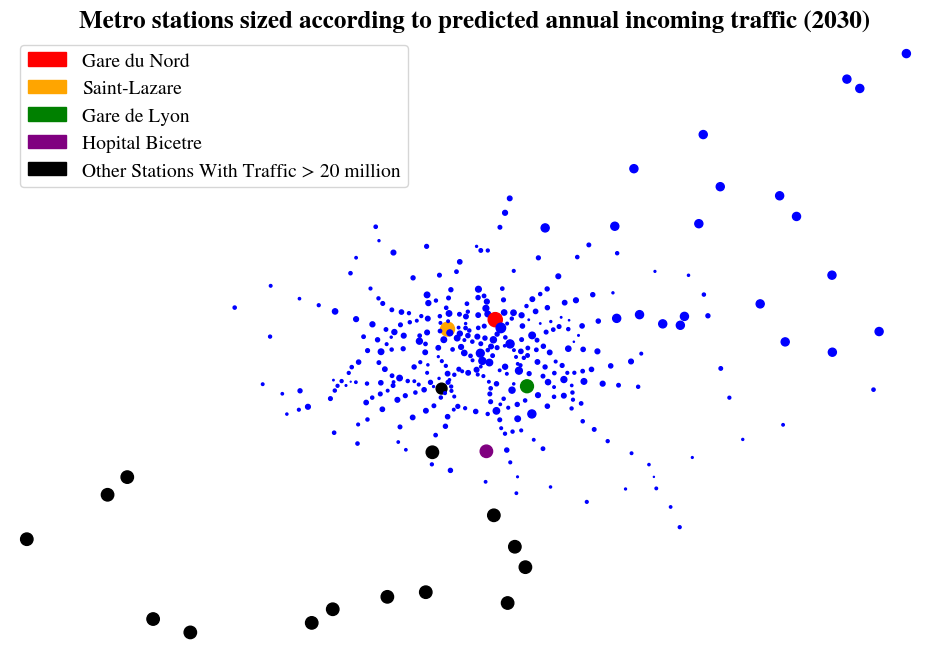

In [49]:
import matplotlib.pyplot as plt
import numpy as np

# Create a dictionary where keys are station names and values are (latitude, longitude) tuples
station_coordinates = {}
for index, row in df_2030.iterrows():
    station_coordinates[row['Station']] = (row['Longitude'], row['Latitude'])

# Get 2030 traffic for each station
traffic_2030 = df_2030.set_index('Station')['2030 Traffic'].to_dict()

# Create a list of node sizes proportional to 2030 traffic
node_sizes = [traffic_2030.get(node, 10) * 0.000003 for node in G.nodes()]  # Default size is 10 if traffic is not found

# Get the top 4 stations with the largest traffic
top_4_stations = sorted(traffic_2030, key=traffic_2030.get, reverse=True)[:4]

# Create a color map for the top 4 stations
color_map = {
    top_4_stations[0]: 'red',
    top_4_stations[1]: 'orange',
    top_4_stations[2]: 'green',
    top_4_stations[3]: 'purple'
}

# Create a list of node colors
node_colors = ['blue' if traffic_2030.get(node, 0) <= 20000000 else 'red' for node in G.nodes()]
for i, node in enumerate(G.nodes()):
    if node in color_map:
        node_colors[i] = color_map[node]
    elif traffic_2030.get(node, 0) > 20000000:  # Change color to black if traffic > 20M and not in top 4
        node_colors[i] = 'black'

# Draw the nodes only
plt.figure(figsize=(12, 8))  # Adjust figure size if needed
nx.draw_networkx_nodes(G, station_coordinates, node_size=node_sizes, node_color=node_colors)  # Customize node color if desired

# Set plot limits based on longitude and latitude
plt.xlim([min(df_2030['Longitude']) - 0.01, max(df_2030['Longitude']) + 0.02])
plt.ylim([min(df_2030['Latitude']) - 0.01, max(df_2030['Latitude']) + 0.01])

plt.title("Metro stations sized according to predicted annual incoming traffic (2030)", fontsize=18, fontweight="bold")

# Create legend elements
red_patch = mpatches.Patch(color='red', label = 'Gare du Nord')
orange_patch = mpatches.Patch(color='orange', label = 'Saint-Lazare')
green_patch = mpatches.Patch(color='green', label = 'Gare de Lyon')
purple_patch = mpatches.Patch(color='purple', label = 'Hopital Bicetre')
black_patch = mpatches.Patch(color='black', label = 'Other Stations With Traffic > 20 million')

# Add the legend to the plot
plt.legend(handles=[red_patch, orange_patch, green_patch, purple_patch, black_patch], fontsize = 14)

plt.box(False)  # Remove the black box around the graph
plt.savefig("2030_geographical_stations_traffic.pdf", bbox_inches='tight')

In [50]:
# Assuming you have df_2030 DataFrame loaded

top_5_stations = sorted(traffic_2030, key=traffic_2030.get, reverse=True)[:5]
print(f"Top 5 stations with the largest traffic: {top_4_stations}")

gare_du_nord_traffic = df_2030.loc[df_2030['Station'] == 'GARE_DU_NORD', '2030 Traffic'].values[0]
saint_lazare_traffic = df_2030.loc[df_2030['Station'] == 'SAINT-LAZARE', '2030 Traffic'].values[0]
gare_de_lyon_traffic = df_2030.loc[df_2030['Station'] == 'GARE_DE_LYON', '2030 Traffic'].values[0]
hopital_bicetre_traffic = df_2030.loc[df_2030['Station'] == 'HOPITAL_BICETRE', '2030 Traffic'].values[0]

print(f"2030 Traffic for Gare du Nord: {gare_du_nord_traffic}")
print(f"2030 Traffic for Saint-Lazare: {saint_lazare_traffic}")
print(f"2030 Traffic for Gare de Lyon: {gare_de_lyon_traffic}")
print(f"2030 Traffic for Hopital Bicetre: {hopital_bicetre_traffic}")


Top 5 stations with the largest traffic: ['GARE_DU_NORD', 'SAINT-LAZARE', 'GARE_DE_LYON', 'HOPITAL_BICETRE']
2030 Traffic for Gare du Nord: 34503097
2030 Traffic for Saint-Lazare: 33128384
2030 Traffic for Gare de Lyon: 28640475
2030 Traffic for Hopital Bicetre: 26563097


## **Traveling Between Every Two Stations**

In [ ]:
def calculate_shortest_paths_with_time(G):
    """Calculates shortest paths and travel times between all station pairs.

    Args:
        G: The NetworkX graph representing the Metro network.

    Returns:
        A list of dictionaries, where each dictionary represents a path
        with 'origin', 'destination', and 'travel_time' keys.
    """

    all_paths = []
    for origin in G.nodes():
        for destination in G.nodes():
            if origin != destination:  # Avoid paths to itself
                try:
                    # Get the shortest path
                    path = nx.shortest_path(G, source=origin, target=destination, weight="time")

                    # Calculate total travel time
                    travel_time = calculate_path_time(G, path)

                    all_paths.append({
                        'origin': origin,
                        'destination': destination,
                        'path': path,  # Include the path itself
                        'travel_time': travel_time
                    })
                except nx.NetworkXNoPath:
                    print(f"No path found between {origin} and {destination}")

    return all_paths

def calculate_path_time(G, path):
  """Calculates the total travel time for a given path,
  including a 4.50-minute penalty for each transfer."""

  total_time = 0
  transfers = 0  # Initialize transfer count

  for i in range(len(path) - 1):
    u, v = path[i], path[i + 1]
    try:
      time = G[u][v]["time"]
      total_time += time

      # Check for transfers (if not the first edge)
      if i > 0:
        current_line = G[path[i - 1]][path[i]].get("label")  # Get the line of the previous edge
        next_line = G[u][v].get("label")  # Get the line of the current edge

        if current_line != next_line:  # If lines are different, it's a transfer
          transfers += 1

    except KeyError:
      print(f"Warning: No time attribute found for edge ({u}, {v}). Skipping...")

  # Add transfer penalty to total time
  total_time += transfers * 4.50
  return total_time

all_paths_with_time = calculate_shortest_paths_with_time(G)

# Create a DataFrame to store the results
df_all_paths = pd.DataFrame(all_paths_with_time)

# Display or save the DataFrame as needed
display(df_all_paths)

average_time = df_all_paths['travel_time'].mean()
print(f"Average time for all paths (mins): {average_time}")

# df_all_paths.to_csv('all_paths_with_time_2030.csv', index=False)

,origin,destination,path,travel_time
0,REPUBLIQUE,TEMPLE,"[REPUBLIQUE, TEMPLE]",1.292
1,REPUBLIQUE,PARMENTIER,"[REPUBLIQUE, PARMENTIER]",1.292
2,REPUBLIQUE,OBERKAMPF,"[REPUBLIQUE, OBERKAMPF]",1.389
3,REPUBLIQUE,STRASBOURG-SAINT-DENIS,"[REPUBLIQUE, STRASBOURG-SAINT-DENIS]",1.389
4,REPUBLIQUE,GONCOURT,"[REPUBLIQUE, GONCOURT]",1.389
...,...,...,...,...
135051,ESPLANADE_DE_LA_DEFENSE,VICTOR_HUGO,"[ESPLANADE_DE_LA_DEFENSE, PONT_DE_NEUILLY, LES...",13.375
135052,ESPLANADE_DE_LA_DEFENSE,PORTE_DAUPHINE,"[ESPLANADE_DE_LA_DEFENSE, PONT_DE_NEUILLY, LES...",14.750
135053,ESPLANADE_DE_LA_DEFENSE,GEORGE_V,"[ESPLANADE_DE_LA_DEFENSE, PONT_DE_NEUILLY, LES...",9.000
135054,ESPLANADE_DE_LA_DEFENSE,LES_SABLONS,"[ESPLANADE_DE_LA_DEFENSE, PONT_DE_NEUILLY, LES...",3.000


Average time for all paths (mins): 34.03713986790664


## **Consider Line Closures**

In [ ]:
# This closes one Metro line at a time but keeps all paths that have an origin or destination that is a "simple station" on the closed line.

def calculate_shortest_paths_with_closures_with_time(G, closed_line):
    """Calculates shortest paths and travel times between all station pairs,
    avoiding a specified Metro line.

    Args:
        G: The NetworkX graph representing the Metro network.
        closed_line: The Metro line number to avoid.

    Returns:
        A list of dictionaries, where each dictionary represents a path
        with 'origin', 'destination', and 'travel_time' keys.
    """

    # Create a subgraph without edges of the closed line
    subgraph = G.copy()  # Make a copy to avoid modifying original graph
    edges_to_remove = [(u, v) for u, v, data in subgraph.edges(data=True) if data.get("label") == closed_line]
    subgraph.remove_edges_from(edges_to_remove)

    all_paths = []
    for origin in G.nodes():
        for destination in G.nodes():
            if origin != destination:  # Avoid paths to itself
                try:
                    # Get the shortest path in the subgraph
                    path = nx.shortest_path(subgraph, source=origin, target=destination, weight="time")

                    # Calculate total travel time (using original graph G)
                    travel_time = calculate_path_time(G, path)

                    all_paths.append({
                        'origin': origin,
                        'destination': destination,
                        'path': path,
                        'travel_time': travel_time
                    })
                except nx.NetworkXNoPath:
                  # print(f"No path found between {origin} and {destination} avoiding line {closed_line}")
                  pass # Ignore cases where there is no path

    return all_paths

def calculate_path_time(G, path):
  """Calculates the total travel time for a given path,
  including a 4.50-minute penalty for each transfer."""

  total_time = 0
  transfers = 0  # Initialize transfer count

  for i in range(len(path) - 1):
    u, v = path[i], path[i + 1]
    try:
      time = G[u][v]["time"]
      total_time += time

      # Check for transfers (if not the first edge)
      if i > 0:
        current_line = G[path[i - 1]][path[i]].get("label")  # Get the line of the previous edge
        next_line = G[u][v].get("label")  # Get the line of the current edge

        if current_line != next_line:  # If lines are different, it's a transfer
          transfers += 1

    except KeyError:
      print(f"Warning: No time attribute found for edge ({u}, {v}). Skipping...")

  # Add transfer penalty to total time
  total_time += transfers * 4.50
  return total_time

for line in metro_lines:
  all_paths_with_time = calculate_shortest_paths_with_closures_with_time(G, line)  # Pass 'line' as closed_line

  # Create a DataFrame to store the results
  df_closed_line = pd.DataFrame(all_paths_with_time)

  # Display the title using HTML
  display(HTML(f"<h3>Results for Line {line} Closure:</h3>"))

  # Display or save the DataFrame as needed
  display(df_closed_line)

  # Calculate and print the average time
  if not df_closed_line.empty: # Check if the dataframe is empty to avoid errors.
    average_time = df_closed_line['travel_time'].mean()
    print(f"Average Time with Line {line} Closed (mins): {average_time}")
  else:
    print(f"No paths found with Line {line} Closed.")

  print()

,origin,destination,path,travel_time
0,REPUBLIQUE,TEMPLE,"[REPUBLIQUE, TEMPLE]",1.292
1,REPUBLIQUE,PARMENTIER,"[REPUBLIQUE, PARMENTIER]",1.292
2,REPUBLIQUE,OBERKAMPF,"[REPUBLIQUE, OBERKAMPF]",1.389
3,REPUBLIQUE,STRASBOURG-SAINT-DENIS,"[REPUBLIQUE, STRASBOURG-SAINT-DENIS]",1.389
4,REPUBLIQUE,GONCOURT,"[REPUBLIQUE, GONCOURT]",1.389
...,...,...,...,...
125665,PORTE_DAUPHINE,LOUISE_MICHEL,"[PORTE_DAUPHINE, VICTOR_HUGO, CHARLES_DE_GAULL...",19.210
125666,PORTE_DAUPHINE,ANATOLE_FRANCE,"[PORTE_DAUPHINE, VICTOR_HUGO, CHARLES_DE_GAULL...",20.502
125667,PORTE_DAUPHINE,PONT_DE_LEVALLOIS-BECON,"[PORTE_DAUPHINE, VICTOR_HUGO, CHARLES_DE_GAULL...",21.794
125668,PORTE_DAUPHINE,PHILIPPE_AUGUSTE,"[PORTE_DAUPHINE, VICTOR_HUGO, CHARLES_DE_GAULL...",48.103


Average Time with Line 1 Closed (mins): 34.58973077106708



,origin,destination,path,travel_time
0,REPUBLIQUE,TEMPLE,"[REPUBLIQUE, TEMPLE]",1.292
1,REPUBLIQUE,PARMENTIER,"[REPUBLIQUE, PARMENTIER]",1.292
2,REPUBLIQUE,OBERKAMPF,"[REPUBLIQUE, OBERKAMPF]",1.389
3,REPUBLIQUE,STRASBOURG-SAINT-DENIS,"[REPUBLIQUE, STRASBOURG-SAINT-DENIS]",1.389
4,REPUBLIQUE,GONCOURT,"[REPUBLIQUE, GONCOURT]",1.389
...,...,...,...,...
124251,ESPLANADE_DE_LA_DEFENSE,ANATOLE_FRANCE,"[ESPLANADE_DE_LA_DEFENSE, PONT_DE_NEUILLY, LES...",38.674
124252,ESPLANADE_DE_LA_DEFENSE,PONT_DE_LEVALLOIS-BECON,"[ESPLANADE_DE_LA_DEFENSE, PONT_DE_NEUILLY, LES...",39.966
124253,ESPLANADE_DE_LA_DEFENSE,GEORGE_V,"[ESPLANADE_DE_LA_DEFENSE, PONT_DE_NEUILLY, LES...",9.000
124254,ESPLANADE_DE_LA_DEFENSE,LES_SABLONS,"[ESPLANADE_DE_LA_DEFENSE, PONT_DE_NEUILLY, LES...",3.000


Average Time with Line 2 Closed (mins): 34.22675090136492



,origin,destination,path,travel_time
0,REPUBLIQUE,OBERKAMPF,"[REPUBLIQUE, OBERKAMPF]",1.389
1,REPUBLIQUE,STRASBOURG-SAINT-DENIS,"[REPUBLIQUE, STRASBOURG-SAINT-DENIS]",1.389
2,REPUBLIQUE,GONCOURT,"[REPUBLIQUE, GONCOURT]",1.389
3,REPUBLIQUE,FILLES_DU_CALVAIRE,"[REPUBLIQUE, FILLES_DU_CALVAIRE]",1.378
4,REPUBLIQUE,JACQUES_BONSERGENT,"[REPUBLIQUE, JACQUES_BONSERGENT]",1.619
...,...,...,...,...
123547,ESPLANADE_DE_LA_DEFENSE,VICTOR_HUGO,"[ESPLANADE_DE_LA_DEFENSE, PONT_DE_NEUILLY, LES...",13.375
123548,ESPLANADE_DE_LA_DEFENSE,PORTE_DAUPHINE,"[ESPLANADE_DE_LA_DEFENSE, PONT_DE_NEUILLY, LES...",14.750
123549,ESPLANADE_DE_LA_DEFENSE,GEORGE_V,"[ESPLANADE_DE_LA_DEFENSE, PONT_DE_NEUILLY, LES...",9.000
123550,ESPLANADE_DE_LA_DEFENSE,LES_SABLONS,"[ESPLANADE_DE_LA_DEFENSE, PONT_DE_NEUILLY, LES...",3.000


Average Time with Line 3 Closed (mins): 33.355341313778816



,origin,destination,path,travel_time
0,REPUBLIQUE,TEMPLE,"[REPUBLIQUE, TEMPLE]",1.292
1,REPUBLIQUE,PARMENTIER,"[REPUBLIQUE, PARMENTIER]",1.292
2,REPUBLIQUE,OBERKAMPF,"[REPUBLIQUE, OBERKAMPF]",1.389
3,REPUBLIQUE,STRASBOURG-SAINT-DENIS,"[REPUBLIQUE, STRASBOURG-SAINT-DENIS]",1.389
4,REPUBLIQUE,GONCOURT,"[REPUBLIQUE, GONCOURT]",1.389
...,...,...,...,...
122845,ESPLANADE_DE_LA_DEFENSE,VICTOR_HUGO,"[ESPLANADE_DE_LA_DEFENSE, PONT_DE_NEUILLY, LES...",13.375
122846,ESPLANADE_DE_LA_DEFENSE,PORTE_DAUPHINE,"[ESPLANADE_DE_LA_DEFENSE, PONT_DE_NEUILLY, LES...",14.750
122847,ESPLANADE_DE_LA_DEFENSE,GEORGE_V,"[ESPLANADE_DE_LA_DEFENSE, PONT_DE_NEUILLY, LES...",9.000
122848,ESPLANADE_DE_LA_DEFENSE,LES_SABLONS,"[ESPLANADE_DE_LA_DEFENSE, PONT_DE_NEUILLY, LES...",3.000


Average Time with Line 4 Closed (mins): 34.4386306064306



,origin,destination,path,travel_time
0,REPUBLIQUE,TEMPLE,"[REPUBLIQUE, TEMPLE]",1.292
1,REPUBLIQUE,PARMENTIER,"[REPUBLIQUE, PARMENTIER]",1.292
2,REPUBLIQUE,OBERKAMPF,"[REPUBLIQUE, OBERKAMPF]",1.389
3,REPUBLIQUE,STRASBOURG-SAINT-DENIS,"[REPUBLIQUE, STRASBOURG-SAINT-DENIS]",1.389
4,REPUBLIQUE,GONCOURT,"[REPUBLIQUE, GONCOURT]",1.389
...,...,...,...,...
126375,ESPLANADE_DE_LA_DEFENSE,VICTOR_HUGO,"[ESPLANADE_DE_LA_DEFENSE, PONT_DE_NEUILLY, LES...",13.375
126376,ESPLANADE_DE_LA_DEFENSE,PORTE_DAUPHINE,"[ESPLANADE_DE_LA_DEFENSE, PONT_DE_NEUILLY, LES...",14.750
126377,ESPLANADE_DE_LA_DEFENSE,GEORGE_V,"[ESPLANADE_DE_LA_DEFENSE, PONT_DE_NEUILLY, LES...",9.000
126378,ESPLANADE_DE_LA_DEFENSE,LES_SABLONS,"[ESPLANADE_DE_LA_DEFENSE, PONT_DE_NEUILLY, LES...",3.000


Average Time with Line 5 Closed (mins): 34.528559787941134



,origin,destination,path,travel_time
0,REPUBLIQUE,TEMPLE,"[REPUBLIQUE, TEMPLE]",1.292
1,REPUBLIQUE,PARMENTIER,"[REPUBLIQUE, PARMENTIER]",1.292
2,REPUBLIQUE,OBERKAMPF,"[REPUBLIQUE, OBERKAMPF]",1.389
3,REPUBLIQUE,STRASBOURG-SAINT-DENIS,"[REPUBLIQUE, STRASBOURG-SAINT-DENIS]",1.389
4,REPUBLIQUE,GONCOURT,"[REPUBLIQUE, GONCOURT]",1.389
...,...,...,...,...
122845,ESPLANADE_DE_LA_DEFENSE,VICTOR_HUGO,"[ESPLANADE_DE_LA_DEFENSE, PONT_DE_NEUILLY, LES...",13.375
122846,ESPLANADE_DE_LA_DEFENSE,PORTE_DAUPHINE,"[ESPLANADE_DE_LA_DEFENSE, PONT_DE_NEUILLY, LES...",14.750
122847,ESPLANADE_DE_LA_DEFENSE,GEORGE_V,"[ESPLANADE_DE_LA_DEFENSE, PONT_DE_NEUILLY, LES...",9.000
122848,ESPLANADE_DE_LA_DEFENSE,LES_SABLONS,"[ESPLANADE_DE_LA_DEFENSE, PONT_DE_NEUILLY, LES...",3.000


Average Time with Line 6 Closed (mins): 33.697894668294666



,origin,destination,path,travel_time
0,REPUBLIQUE,TEMPLE,"[REPUBLIQUE, TEMPLE]",1.292
1,REPUBLIQUE,PARMENTIER,"[REPUBLIQUE, PARMENTIER]",1.292
2,REPUBLIQUE,OBERKAMPF,"[REPUBLIQUE, OBERKAMPF]",1.389
3,REPUBLIQUE,STRASBOURG-SAINT-DENIS,"[REPUBLIQUE, STRASBOURG-SAINT-DENIS]",1.389
4,REPUBLIQUE,GONCOURT,"[REPUBLIQUE, GONCOURT]",1.389
...,...,...,...,...
117301,ESPLANADE_DE_LA_DEFENSE,VICTOR_HUGO,"[ESPLANADE_DE_LA_DEFENSE, PONT_DE_NEUILLY, LES...",13.375
117302,ESPLANADE_DE_LA_DEFENSE,PORTE_DAUPHINE,"[ESPLANADE_DE_LA_DEFENSE, PONT_DE_NEUILLY, LES...",14.750
117303,ESPLANADE_DE_LA_DEFENSE,GEORGE_V,"[ESPLANADE_DE_LA_DEFENSE, PONT_DE_NEUILLY, LES...",9.000
117304,ESPLANADE_DE_LA_DEFENSE,LES_SABLONS,"[ESPLANADE_DE_LA_DEFENSE, PONT_DE_NEUILLY, LES...",3.000


Average Time with Line 7 Closed (mins): 33.34418295739348



,origin,destination,path,travel_time
0,REPUBLIQUE,TEMPLE,"[REPUBLIQUE, TEMPLE]",1.292
1,REPUBLIQUE,PARMENTIER,"[REPUBLIQUE, PARMENTIER]",1.292
2,REPUBLIQUE,OBERKAMPF,"[REPUBLIQUE, OBERKAMPF]",1.389
3,REPUBLIQUE,STRASBOURG-SAINT-DENIS,"[REPUBLIQUE, STRASBOURG-SAINT-DENIS]",1.389
4,REPUBLIQUE,GONCOURT,"[REPUBLIQUE, GONCOURT]",1.389
...,...,...,...,...
117987,ESPLANADE_DE_LA_DEFENSE,VICTOR_HUGO,"[ESPLANADE_DE_LA_DEFENSE, PONT_DE_NEUILLY, LES...",13.375
117988,ESPLANADE_DE_LA_DEFENSE,PORTE_DAUPHINE,"[ESPLANADE_DE_LA_DEFENSE, PONT_DE_NEUILLY, LES...",14.750
117989,ESPLANADE_DE_LA_DEFENSE,GEORGE_V,"[ESPLANADE_DE_LA_DEFENSE, PONT_DE_NEUILLY, LES...",9.000
117990,ESPLANADE_DE_LA_DEFENSE,LES_SABLONS,"[ESPLANADE_DE_LA_DEFENSE, PONT_DE_NEUILLY, LES...",3.000


Average Time with Line 8 Closed (mins): 33.46199250796664



,origin,destination,path,travel_time
0,REPUBLIQUE,TEMPLE,"[REPUBLIQUE, TEMPLE]",1.292
1,REPUBLIQUE,PARMENTIER,"[REPUBLIQUE, PARMENTIER]",1.292
2,REPUBLIQUE,OBERKAMPF,"[REPUBLIQUE, FILLES_DU_CALVAIRE, SAINT-SEBASTI...",14.869
3,REPUBLIQUE,STRASBOURG-SAINT-DENIS,"[REPUBLIQUE, ARTS_ET_METIERS, REAUMUR-SEBASTOP...",12.931
4,REPUBLIQUE,GONCOURT,"[REPUBLIQUE, GONCOURT]",1.389
...,...,...,...,...
117987,ESPLANADE_DE_LA_DEFENSE,VICTOR_HUGO,"[ESPLANADE_DE_LA_DEFENSE, PONT_DE_NEUILLY, LES...",13.375
117988,ESPLANADE_DE_LA_DEFENSE,PORTE_DAUPHINE,"[ESPLANADE_DE_LA_DEFENSE, PONT_DE_NEUILLY, LES...",14.750
117989,ESPLANADE_DE_LA_DEFENSE,GEORGE_V,"[ESPLANADE_DE_LA_DEFENSE, PONT_DE_NEUILLY, LES...",9.000
117990,ESPLANADE_DE_LA_DEFENSE,LES_SABLONS,"[ESPLANADE_DE_LA_DEFENSE, PONT_DE_NEUILLY, LES...",3.000


Average Time with Line 9 Closed (mins): 34.1753557020815



,origin,destination,path,travel_time
0,REPUBLIQUE,TEMPLE,"[REPUBLIQUE, TEMPLE]",1.292
1,REPUBLIQUE,PARMENTIER,"[REPUBLIQUE, PARMENTIER]",1.292
2,REPUBLIQUE,OBERKAMPF,"[REPUBLIQUE, OBERKAMPF]",1.389
3,REPUBLIQUE,STRASBOURG-SAINT-DENIS,"[REPUBLIQUE, STRASBOURG-SAINT-DENIS]",1.389
4,REPUBLIQUE,GONCOURT,"[REPUBLIQUE, GONCOURT]",1.389
...,...,...,...,...
131401,ESPLANADE_DE_LA_DEFENSE,VICTOR_HUGO,"[ESPLANADE_DE_LA_DEFENSE, PONT_DE_NEUILLY, LES...",13.375
131402,ESPLANADE_DE_LA_DEFENSE,PORTE_DAUPHINE,"[ESPLANADE_DE_LA_DEFENSE, PONT_DE_NEUILLY, LES...",14.750
131403,ESPLANADE_DE_LA_DEFENSE,GEORGE_V,"[ESPLANADE_DE_LA_DEFENSE, PONT_DE_NEUILLY, LES...",9.000
131404,ESPLANADE_DE_LA_DEFENSE,LES_SABLONS,"[ESPLANADE_DE_LA_DEFENSE, PONT_DE_NEUILLY, LES...",3.000


Average Time with Line 7.5 Closed (mins): 34.051902287566776



,origin,destination,path,travel_time
0,REPUBLIQUE,TEMPLE,"[REPUBLIQUE, TEMPLE]",1.292
1,REPUBLIQUE,PARMENTIER,"[REPUBLIQUE, PARMENTIER]",1.292
2,REPUBLIQUE,OBERKAMPF,"[REPUBLIQUE, OBERKAMPF]",1.389
3,REPUBLIQUE,STRASBOURG-SAINT-DENIS,"[REPUBLIQUE, STRASBOURG-SAINT-DENIS]",1.389
4,REPUBLIQUE,FILLES_DU_CALVAIRE,"[REPUBLIQUE, FILLES_DU_CALVAIRE]",1.378
...,...,...,...,...
124957,ESPLANADE_DE_LA_DEFENSE,VICTOR_HUGO,"[ESPLANADE_DE_LA_DEFENSE, PONT_DE_NEUILLY, LES...",13.375
124958,ESPLANADE_DE_LA_DEFENSE,PORTE_DAUPHINE,"[ESPLANADE_DE_LA_DEFENSE, PONT_DE_NEUILLY, LES...",14.750
124959,ESPLANADE_DE_LA_DEFENSE,GEORGE_V,"[ESPLANADE_DE_LA_DEFENSE, PONT_DE_NEUILLY, LES...",9.000
124960,ESPLANADE_DE_LA_DEFENSE,LES_SABLONS,"[ESPLANADE_DE_LA_DEFENSE, PONT_DE_NEUILLY, LES...",3.000


Average Time with Line 11 Closed (mins): 34.118988124389816



,origin,destination,path,travel_time
0,REPUBLIQUE,TEMPLE,"[REPUBLIQUE, TEMPLE]",1.292
1,REPUBLIQUE,PARMENTIER,"[REPUBLIQUE, PARMENTIER]",1.292
2,REPUBLIQUE,OBERKAMPF,"[REPUBLIQUE, OBERKAMPF]",1.389
3,REPUBLIQUE,STRASBOURG-SAINT-DENIS,"[REPUBLIQUE, STRASBOURG-SAINT-DENIS]",1.389
4,REPUBLIQUE,GONCOURT,"[REPUBLIQUE, GONCOURT]",1.389
...,...,...,...,...
120057,ESPLANADE_DE_LA_DEFENSE,VICTOR_HUGO,"[ESPLANADE_DE_LA_DEFENSE, PONT_DE_NEUILLY, LES...",13.375
120058,ESPLANADE_DE_LA_DEFENSE,PORTE_DAUPHINE,"[ESPLANADE_DE_LA_DEFENSE, PONT_DE_NEUILLY, LES...",14.750
120059,ESPLANADE_DE_LA_DEFENSE,GEORGE_V,"[ESPLANADE_DE_LA_DEFENSE, PONT_DE_NEUILLY, LES...",9.000
120060,ESPLANADE_DE_LA_DEFENSE,LES_SABLONS,"[ESPLANADE_DE_LA_DEFENSE, PONT_DE_NEUILLY, LES...",3.000


Average Time with Line 12 Closed (mins): 33.848771034965274



,origin,destination,path,travel_time
0,REPUBLIQUE,TEMPLE,"[REPUBLIQUE, TEMPLE]",1.292
1,REPUBLIQUE,PARMENTIER,"[REPUBLIQUE, PARMENTIER]",1.292
2,REPUBLIQUE,OBERKAMPF,"[REPUBLIQUE, OBERKAMPF]",1.389
3,REPUBLIQUE,STRASBOURG-SAINT-DENIS,"[REPUBLIQUE, STRASBOURG-SAINT-DENIS]",1.389
4,REPUBLIQUE,GONCOURT,"[REPUBLIQUE, GONCOURT]",1.389
...,...,...,...,...
120057,ESPLANADE_DE_LA_DEFENSE,VICTOR_HUGO,"[ESPLANADE_DE_LA_DEFENSE, PONT_DE_NEUILLY, LES...",13.375
120058,ESPLANADE_DE_LA_DEFENSE,PORTE_DAUPHINE,"[ESPLANADE_DE_LA_DEFENSE, PONT_DE_NEUILLY, LES...",14.750
120059,ESPLANADE_DE_LA_DEFENSE,GEORGE_V,"[ESPLANADE_DE_LA_DEFENSE, PONT_DE_NEUILLY, LES...",9.000
120060,ESPLANADE_DE_LA_DEFENSE,LES_SABLONS,"[ESPLANADE_DE_LA_DEFENSE, PONT_DE_NEUILLY, LES...",3.000


Average Time with Line 13 Closed (mins): 34.25423246322733



,origin,destination,path,travel_time
0,REPUBLIQUE,TEMPLE,"[REPUBLIQUE, TEMPLE]",1.292
1,REPUBLIQUE,PARMENTIER,"[REPUBLIQUE, PARMENTIER]",1.292
2,REPUBLIQUE,OBERKAMPF,"[REPUBLIQUE, OBERKAMPF]",1.389
3,REPUBLIQUE,STRASBOURG-SAINT-DENIS,"[REPUBLIQUE, STRASBOURG-SAINT-DENIS]",1.389
4,REPUBLIQUE,GONCOURT,"[REPUBLIQUE, GONCOURT]",1.389
...,...,...,...,...
121537,ESPLANADE_DE_LA_DEFENSE,VICTOR_HUGO,"[ESPLANADE_DE_LA_DEFENSE, PONT_DE_NEUILLY, LES...",13.375
121538,ESPLANADE_DE_LA_DEFENSE,PORTE_DAUPHINE,"[ESPLANADE_DE_LA_DEFENSE, PONT_DE_NEUILLY, LES...",14.750
121539,ESPLANADE_DE_LA_DEFENSE,GEORGE_V,"[ESPLANADE_DE_LA_DEFENSE, PONT_DE_NEUILLY, LES...",9.000
121540,ESPLANADE_DE_LA_DEFENSE,LES_SABLONS,"[ESPLANADE_DE_LA_DEFENSE, PONT_DE_NEUILLY, LES...",3.000


Average Time with Line 14 Closed (mins): 32.20153444899705



,origin,destination,path,travel_time
0,REPUBLIQUE,TEMPLE,"[REPUBLIQUE, TEMPLE]",1.292
1,REPUBLIQUE,PARMENTIER,"[REPUBLIQUE, PARMENTIER]",1.292
2,REPUBLIQUE,OBERKAMPF,"[REPUBLIQUE, OBERKAMPF]",1.389
3,REPUBLIQUE,STRASBOURG-SAINT-DENIS,"[REPUBLIQUE, STRASBOURG-SAINT-DENIS]",1.389
4,REPUBLIQUE,GONCOURT,"[REPUBLIQUE, GONCOURT]",1.389
...,...,...,...,...
124251,ESPLANADE_DE_LA_DEFENSE,VICTOR_HUGO,"[ESPLANADE_DE_LA_DEFENSE, PONT_DE_NEUILLY, LES...",13.375
124252,ESPLANADE_DE_LA_DEFENSE,PORTE_DAUPHINE,"[ESPLANADE_DE_LA_DEFENSE, PONT_DE_NEUILLY, LES...",14.750
124253,ESPLANADE_DE_LA_DEFENSE,GEORGE_V,"[ESPLANADE_DE_LA_DEFENSE, PONT_DE_NEUILLY, LES...",9.000
124254,ESPLANADE_DE_LA_DEFENSE,LES_SABLONS,"[ESPLANADE_DE_LA_DEFENSE, PONT_DE_NEUILLY, LES...",3.000


Average Time with Line 10 Closed (mins): 33.78414404133402



,origin,destination,path,travel_time
0,REPUBLIQUE,TEMPLE,"[REPUBLIQUE, TEMPLE]",1.292
1,REPUBLIQUE,PARMENTIER,"[REPUBLIQUE, PARMENTIER]",1.292
2,REPUBLIQUE,OBERKAMPF,"[REPUBLIQUE, OBERKAMPF]",1.389
3,REPUBLIQUE,STRASBOURG-SAINT-DENIS,"[REPUBLIQUE, STRASBOURG-SAINT-DENIS]",1.389
4,REPUBLIQUE,GONCOURT,"[REPUBLIQUE, GONCOURT]",1.389
...,...,...,...,...
133585,ESPLANADE_DE_LA_DEFENSE,VICTOR_HUGO,"[ESPLANADE_DE_LA_DEFENSE, PONT_DE_NEUILLY, LES...",13.375
133586,ESPLANADE_DE_LA_DEFENSE,PORTE_DAUPHINE,"[ESPLANADE_DE_LA_DEFENSE, PONT_DE_NEUILLY, LES...",14.750
133587,ESPLANADE_DE_LA_DEFENSE,GEORGE_V,"[ESPLANADE_DE_LA_DEFENSE, PONT_DE_NEUILLY, LES...",9.000
133588,ESPLANADE_DE_LA_DEFENSE,LES_SABLONS,"[ESPLANADE_DE_LA_DEFENSE, PONT_DE_NEUILLY, LES...",3.000


Average Time with Line 3.5 Closed (mins): 33.875814492102705



,origin,destination,path,travel_time
0,REPUBLIQUE,TEMPLE,"[REPUBLIQUE, TEMPLE]",1.292
1,REPUBLIQUE,PARMENTIER,"[REPUBLIQUE, PARMENTIER]",1.292
2,REPUBLIQUE,OBERKAMPF,"[REPUBLIQUE, OBERKAMPF]",1.389
3,REPUBLIQUE,STRASBOURG-SAINT-DENIS,"[REPUBLIQUE, STRASBOURG-SAINT-DENIS]",1.389
4,REPUBLIQUE,GONCOURT,"[REPUBLIQUE, GONCOURT]",1.389
...,...,...,...,...
119365,ESPLANADE_DE_LA_DEFENSE,VICTOR_HUGO,"[ESPLANADE_DE_LA_DEFENSE, PONT_DE_NEUILLY, LES...",13.375
119366,ESPLANADE_DE_LA_DEFENSE,PORTE_DAUPHINE,"[ESPLANADE_DE_LA_DEFENSE, PONT_DE_NEUILLY, LES...",14.750
119367,ESPLANADE_DE_LA_DEFENSE,GEORGE_V,"[ESPLANADE_DE_LA_DEFENSE, PONT_DE_NEUILLY, LES...",9.000
119368,ESPLANADE_DE_LA_DEFENSE,LES_SABLONS,"[ESPLANADE_DE_LA_DEFENSE, PONT_DE_NEUILLY, LES...",3.000


Average Time with Line 15 Closed (mins): 36.38770464940939



,origin,destination,path,travel_time
0,REPUBLIQUE,TEMPLE,"[REPUBLIQUE, TEMPLE]",1.292
1,REPUBLIQUE,PARMENTIER,"[REPUBLIQUE, PARMENTIER]",1.292
2,REPUBLIQUE,OBERKAMPF,"[REPUBLIQUE, OBERKAMPF]",1.389
3,REPUBLIQUE,STRASBOURG-SAINT-DENIS,"[REPUBLIQUE, STRASBOURG-SAINT-DENIS]",1.389
4,REPUBLIQUE,GONCOURT,"[REPUBLIQUE, GONCOURT]",1.389
...,...,...,...,...
130677,ESPLANADE_DE_LA_DEFENSE,VICTOR_HUGO,"[ESPLANADE_DE_LA_DEFENSE, PONT_DE_NEUILLY, LES...",13.375
130678,ESPLANADE_DE_LA_DEFENSE,PORTE_DAUPHINE,"[ESPLANADE_DE_LA_DEFENSE, PONT_DE_NEUILLY, LES...",14.750
130679,ESPLANADE_DE_LA_DEFENSE,GEORGE_V,"[ESPLANADE_DE_LA_DEFENSE, PONT_DE_NEUILLY, LES...",9.000
130680,ESPLANADE_DE_LA_DEFENSE,LES_SABLONS,"[ESPLANADE_DE_LA_DEFENSE, PONT_DE_NEUILLY, LES...",3.000


Average Time with Line 16 Closed (mins): 33.756655469001096



,origin,destination,path,travel_time
0,REPUBLIQUE,TEMPLE,"[REPUBLIQUE, TEMPLE]",1.292
1,REPUBLIQUE,PARMENTIER,"[REPUBLIQUE, PARMENTIER]",1.292
2,REPUBLIQUE,OBERKAMPF,"[REPUBLIQUE, OBERKAMPF]",1.389
3,REPUBLIQUE,STRASBOURG-SAINT-DENIS,"[REPUBLIQUE, STRASBOURG-SAINT-DENIS]",1.389
4,REPUBLIQUE,GONCOURT,"[REPUBLIQUE, GONCOURT]",1.389
...,...,...,...,...
130677,ESPLANADE_DE_LA_DEFENSE,VICTOR_HUGO,"[ESPLANADE_DE_LA_DEFENSE, PONT_DE_NEUILLY, LES...",13.375
130678,ESPLANADE_DE_LA_DEFENSE,PORTE_DAUPHINE,"[ESPLANADE_DE_LA_DEFENSE, PONT_DE_NEUILLY, LES...",14.750
130679,ESPLANADE_DE_LA_DEFENSE,GEORGE_V,"[ESPLANADE_DE_LA_DEFENSE, PONT_DE_NEUILLY, LES...",9.000
130680,ESPLANADE_DE_LA_DEFENSE,LES_SABLONS,"[ESPLANADE_DE_LA_DEFENSE, PONT_DE_NEUILLY, LES...",3.000


Average Time with Line 17 Closed (mins): 33.28131442738863



,origin,destination,path,travel_time
0,REPUBLIQUE,TEMPLE,"[REPUBLIQUE, TEMPLE]",1.292
1,REPUBLIQUE,PARMENTIER,"[REPUBLIQUE, PARMENTIER]",1.292
2,REPUBLIQUE,OBERKAMPF,"[REPUBLIQUE, OBERKAMPF]",1.389
3,REPUBLIQUE,STRASBOURG-SAINT-DENIS,"[REPUBLIQUE, STRASBOURG-SAINT-DENIS]",1.389
4,REPUBLIQUE,GONCOURT,"[REPUBLIQUE, GONCOURT]",1.389
...,...,...,...,...
128517,ESPLANADE_DE_LA_DEFENSE,VICTOR_HUGO,"[ESPLANADE_DE_LA_DEFENSE, PONT_DE_NEUILLY, LES...",13.375
128518,ESPLANADE_DE_LA_DEFENSE,PORTE_DAUPHINE,"[ESPLANADE_DE_LA_DEFENSE, PONT_DE_NEUILLY, LES...",14.750
128519,ESPLANADE_DE_LA_DEFENSE,GEORGE_V,"[ESPLANADE_DE_LA_DEFENSE, PONT_DE_NEUILLY, LES...",9.000
128520,ESPLANADE_DE_LA_DEFENSE,LES_SABLONS,"[ESPLANADE_DE_LA_DEFENSE, PONT_DE_NEUILLY, LES...",3.000


Average Time with Line 18 Closed (mins): 32.2720111887459



## **The Simulation: Calculates the Two Traffic Metrics**

In [ ]:
def update_node_with_lambda(G, lambda_dictionary):
  for node in G.nodes():
    G.nodes[node]["lambda"] = lambda_dictionary[node] / 100
  return G

def inputs():
    for station in G.nodes():
        probs = {}

        # Get shortest path lengths from the current station
        shortest_paths = nx.shortest_path_length(G, source=station)

        # Buckets for different travel distances
        long_trip = []  # 10+ stops
        medium_trip = []  # 5-10 stops
        short_trip = []  # <5 stops

        for node, distance in shortest_paths.items():
            if node == station:
                continue  # Skip self
            if distance >= 10:
                long_trip.append(node)
            elif 5 <= distance < 10:
                medium_trip.append(node)
            else:
                short_trip.append(node)

        # Assign probabilities based on the given distribution
        total_nodes = len(long_trip) + len(medium_trip) + len(short_trip)

        if total_nodes > 0:
            p_long = 0.3 / max(1, len(long_trip))
            p_medium = 0.35 / max(1, len(medium_trip))
            p_short = 0.35 / max(1, len(short_trip))

            for node in long_trip:
                probs[node] = p_long
            for node in medium_trip:
                probs[node] = p_medium
            for node in short_trip:
                probs[node] = p_short

        # Normalize the probabilities to sum to 1
        total_prob = sum(probs.values())
        if total_prob > 0:
            probs = {k: v / total_prob for k, v in probs.items()}

        lambda_value = (lambda_dictionary[station] / 100)

        # Store in graph
        G.nodes[station]["data"] = (probs, lambda_value)

    return G

def simulate_arrivals(G, days):
    """Generates passenger arrivals at each station using a Poisson distribution."""
    arrivals = {}
    for station in G.nodes():
        _, lambda_value = G.nodes[station]["data"]
        arrivals[station] = np.random.poisson(lam=lambda_value, size=days)
    return arrivals

def simulate_passenger_journeys(G, daily_arrivals):
    journeys = []

    for station, arrivals in daily_arrivals.items():
        total_passengers = sum(arrivals)  # Total passengers arriving in the day

        for _ in range(total_passengers):
          # Get the probability distribution for the current station
          probs, _ = G.nodes[station]["data"]

          # Choose a destination based on the probability distribution
          if probs:  # Check if probs is not empty
              destinations = list(probs.keys())
              probabilities = list(probs.values())
              destination = np.random.choice(destinations, p=probabilities)
          else:
              # If probs is empty, choose a random destination (as a fallback)
              destination = np.random.choice([s for s in stations if s != station])

          path_nodes = nx.shortest_path(G, source=station, target=destination)
          path_edges = [(path_nodes[i], path_nodes[i + 1]) for i in range(len(path_nodes) - 1)]
          path_line_number = nx.get_edge_attributes(G, "label")
          path_length = nx.get_edge_attributes(G, "length")
          journeys.append(path_nodes)

    return journeys

def calculate_avg_transfers(G, results):
    """Calculates the average number of transfers that someone who starts at each station would have to make to get to their final destination."""

    station_transfers = {}  # Store total transfers for each starting station
    station_counts = {}    # Store the number of journeys starting from each station

    for person_id, journey in enumerate(results):
        start_station = journey[0]  # Get the starting station for this journey

        # If this is the first journey from this station, initialize counts
        station_transfers.setdefault(start_station, 0)
        station_counts.setdefault(start_station, 0)

        # Count the transfers for this journey (same logic as before)
        transfers = 0
        if len(journey) > 2:
            for i in range(len(journey) - 2):
                current_edge = (journey[i], journey[i + 1])
                next_edge = (journey[i + 1], journey[i + 2])
                if G.get_edge_data(*current_edge).get("label") != G.get_edge_data(*next_edge).get("label"):
                    transfers += 1

        station_transfers[start_station] += transfers  # Add transfers for this journey
        station_counts[start_station] += 1           # Increment journey count for this station

    # Calculate averages
    avg_transfers = {}
    for station in station_transfers:
        avg_transfers[station] = station_transfers[station] / station_counts[station]

    return avg_transfers

def calculate_path_time(G, path):
  """Calculates the total travel time for a given path,
  including a 4.50-minute penalty for each transfer."""

  total_time = 0
  transfers = 0  # Initialize transfer count

  for i in range(len(path) - 1):
    u, v = path[i], path[i + 1]
    try:
      time = G[u][v]["time"]
      total_time += time

      # Check for transfers (if not the first edge)
      if i > 0:
        current_line = G[path[i - 1]][path[i]].get("label")  # Get the line of the previous edge
        next_line = G[u][v].get("label")  # Get the line of the current edge

        if current_line != next_line:  # If lines are different, it's a transfer
          transfers += 1

    except KeyError:
      print(f"Warning: No time attribute found for edge ({u}, {v}). Skipping...")

  # Add transfer penalty to total time
  total_time += transfers * 4.50
  return total_time

def get_destination(path):
  return path[-1]  # The destination is the last element in the path

lambda_dictionary = dict(zip(df_2030['Station'], df_2030['2030 Traffic'] / 365))
G = inputs()
stations = list(G.nodes())
daily_arrivals = simulate_arrivals(G, 3)
G = update_node_with_lambda(G, lambda_dictionary)
results = simulate_passenger_journeys(G, daily_arrivals) # Run the simulation

# Create a list to store the data for the DataFrame
data_results = []
for i, journey in enumerate(results):
    data_results.append({'person_id': i + 1, 'path': journey})  # Store the entire path

# Create a DataFrame from the data
df_results = pd.DataFrame(data_results)
df_results['path_time'] = df_results['path'].apply(lambda path: calculate_path_time(G, path))

df_results['origin'] = df_results['path'].apply(lambda x: x[0])
df_results['destination'] = df_results['path'].apply(get_destination)

# Print the DataFrame
display(df_results)

average_path_time = df_results['path_time'].mean()
print(f"Average Path Time (mins): {average_path_time}")

# Calculate and print the average transfers
avg_transfers_result = calculate_avg_transfers(G, results)
print("The average # transfers a person who starts at each station needs to make to get to their destination")
print(avg_transfers_result)

,person_id,path,path_time,origin,destination
0,1,"[REPUBLIQUE, OBERKAMPF, SAINT-AMBROISE, VOLTAI...",15.834,REPUBLIQUE,SAINT-MANDE-TOURELLE
1,2,"[REPUBLIQUE, OBERKAMPF, SAINT-AMBROISE, VOLTAI...",17.334,REPUBLIQUE,BERAULT
2,3,"[REPUBLIQUE, STRASBOURG-SAINT-DENIS, BONNE_NOU...",26.001,REPUBLIQUE,LA_TOUR-MAUBOURG
3,4,"[REPUBLIQUE, STRASBOURG-SAINT-DENIS, BONNE_NOU...",30.467,REPUBLIQUE,SAINT-PHILIPPE-DU-ROULE
4,5,"[REPUBLIQUE, ARTS_ET_METIERS, RAMBUTEAU, HOTEL...",32.687,REPUBLIQUE,VILLEJUIF-LOUIS_ARAGON
...,...,...,...,...,...
127387,127388,"[ESPLANADE_DE_LA_DEFENSE, PONT_DE_NEUILLY]",1.500,ESPLANADE_DE_LA_DEFENSE,PONT_DE_NEUILLY
127388,127389,"[ESPLANADE_DE_LA_DEFENSE, LA_DEFENSE]",1.500,ESPLANADE_DE_LA_DEFENSE,LA_DEFENSE
127389,127390,"[ESPLANADE_DE_LA_DEFENSE, PONT_DE_NEUILLY, LES...",40.440,ESPLANADE_DE_LA_DEFENSE,NATIONALE
127390,127391,"[ESPLANADE_DE_LA_DEFENSE, LA_DEFENSE]",1.500,ESPLANADE_DE_LA_DEFENSE,LA_DEFENSE


Average Path Time (mins): 23.852258540567696
The average # transfers a person who starts at each station needs to make to get to their destination
{'REPUBLIQUE': 1.5869797225186766, 'TEMPLE': 2.2261904761904763, 'PARMENTIER': 2.453488372093023, 'OBERKAMPF': 1.8308823529411764, 'STRASBOURG-SAINT-DENIS': 1.6557059961315281, 'GONCOURT': 2.207865168539326, 'FILLES_DU_CALVAIRE': 2.268292682926829, 'JACQUES_BONSERGENT': 2.106382978723404, 'ARTS_ET_METIERS': 1.683168316831683, 'SAINT-LAZARE': 1.5652813534387642, 'EUROPE': 2.206896551724138, 'HAVRE-CAUMARTIN': 2.391472868217054, 'MADELEINE': 1.542528735632184, 'LIEGE': 2.3258426966292136, 'MIROMESNIL': 2.0341296928327646, 'PONT_CARDINET': 1.8501362397820162, "TRINITE-D'ESTIENNE_D'ORVES": 2.2736842105263158, 'CHATELET': 1.4336, 'LOUVRE': 1.9813664596273293, 'CITE': 2.066666666666667, 'PYRAMIDES': 1.746177370030581, 'PONT_MARIE': 2.1782178217821784, 'PONT_NEUF': 2.0736842105263156, 'LES_HALLES': 2.065934065934066, 'GARE_DE_LYON': 1.4848877374784

In [ ]:
for node in G.nodes():
    _, lambda_val = G.nodes[node]['data']  # Unpack the tuple
    print(f"Node {node}: Lambda = {lambda_val}")

Node REPUBLIQUE: Lambda = 303.5536438356164
Node TEMPLE: Lambda = 24.434465753424657
Node PARMENTIER: Lambda = 55.814630136986295
Node OBERKAMPF: Lambda = 87.81123287671232
Node STRASBOURG-SAINT-DENIS: Lambda = 173.85671232876714
Node GONCOURT: Lambda = 60.25123287671233
Node FILLES_DU_CALVAIRE: Lambda = 29.96364383561644
Node JACQUES_BONSERGENT: Lambda = 47.78052054794521
Node ARTS_ET_METIERS: Lambda = 65.83676712328767
Node SAINT-LAZARE: Lambda = 907.6269589041096
Node EUROPE: Lambda = 30.313945205479452
Node HAVRE-CAUMARTIN: Lambda = 161.50635616438356
Node MADELEINE: Lambda = 146.05282191780822
Node LIEGE: Lambda = 31.3412602739726
Node MIROMESNIL: Lambda = 99.92479452054795
Node PONT_CARDINET: Lambda = 114.2065205479452
Node TRINITE-D'ESTIENNE_D'ORVES: Lambda = 28.821424657534248
Node CHATELET: Lambda = 228.78887671232877
Node LOUVRE: Lambda = 51.22224657534247
Node CITE: Lambda = 27.524849315068494
Node PYRAMIDES: Lambda = 108.56706849315069
Node PONT_MARIE: Lambda = 30.177589041

In [ ]:
def find_changing_stations(G, results):
    changing_stations_per_person = {}  # Dictionary to store changing stations for each person

    for person_id, journey in enumerate(results):
        changing_stations = []

        if len(journey) > 2:  # Only check for changes if the journey involves more than 2 stations
          for i in range(len(journey) - 2):
              current_edge = (journey[i], journey[i + 1])
              next_edge = (journey[i + 1], journey[i + 2])

              current_line = G.get_edge_data(*current_edge).get("label")  # Get the line of the current edge
              next_line = G.get_edge_data(*next_edge).get("label")  # Get the line of the next edge

              if current_line != next_line:  # If lines are different, it's a changing station
                  changing_stations.append(journey[i + 1])

        changing_stations_per_person[person_id + 1] = changing_stations  # Store for this person

    return changing_stations_per_person

def calculate_transfers_per_station(changing_stations_result):
    transfer_counts = {}  # Initialize an empty dictionary to store transfer counts for each station

    for person_transfers in changing_stations_result.values():  # Iterate through transfer stations for each person
        for station in person_transfers:  # Iterate through transfer stations for this person
            transfer_counts[station] = transfer_counts.get(station, 0) + 1  # Increment transfer count for this station

    return transfer_counts

changing_stations_result = find_changing_stations(G, results)
print(changing_stations_result)
transfer_counts_result = calculate_transfers_per_station(changing_stations_result)

# Print and download the data from transfer_counts_result
print("Number of transfers at each station:", transfer_counts_result)
transfer_counts_result_df = pd.DataFrame(list(transfer_counts_result.items()), columns=['Station', 'Transfer_Count'])
transfer_counts_result_df = transfer_counts_result_df.sort_values(by=['Transfer_Count'], ascending=False) # Sort by transfer count in descending order
transfer_counts_result_df.to_csv("transfer_counts_result.csv", index=False)

# Add the 'transfer_stations' column to the DataFrame
df_results['transfer_stations'] = df_results['person_id'].apply(lambda person_id: changing_stations_result.get(person_id, []))

# Display the updated DataFrame
display(df_results)

df_results.to_csv("df_results_2030.csv", index=False)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Create the 'Station' column
stations = list(G.nodes())
df_congestion_2030 = pd.DataFrame({'Station': stations})

# Incoming Traffic
incoming_traffic = df_results['origin'].value_counts().rename_axis('Station').reset_index(name='Incoming Traffic')
df_congestion_2030 = pd.merge(df_congestion_2030, incoming_traffic, on='Station', how='left')
df_congestion_2030['Incoming Traffic'] = df_congestion_2030['Incoming Traffic'].fillna(0).astype(int)

# Transfer Traffic
transfer_counts_series = pd.Series(transfer_counts_result, name='Transfer Traffic')
df_congestion_2030 = pd.merge(df_congestion_2030, transfer_counts_series, left_on='Station', right_index=True, how='left')
df_congestion_2030['Transfer Traffic'] = df_congestion_2030['Transfer Traffic'].fillna(0).astype(int)

# Exiting Traffic
exiting_traffic = df_results['destination'].value_counts().rename_axis('Station').reset_index(name='Exiting Traffic')
df_congestion_2030 = pd.merge(df_congestion_2030, exiting_traffic, on='Station', how='left')
df_congestion_2030['Exiting Traffic'] = df_congestion_2030['Exiting Traffic'].fillna(0).astype(int)

# Total Traffic
df_congestion_2030['Total Traffic'] = df_congestion_2030['Incoming Traffic'] + df_congestion_2030['Transfer Traffic'] + df_congestion_2030['Exiting Traffic']

# Save and display
display(df_congestion_2030)
df_congestion_2030.to_csv('df_congestion_2030.csv', index=False)

,Station,Incoming Traffic,Transfer Traffic,Exiting Traffic,Total Traffic
0,REPUBLIQUE,937,7405,340,8682
1,TEMPLE,84,0,316,400
2,PARMENTIER,172,0,310,482
3,OBERKAMPF,272,3181,312,3765
4,STRASBOURG-SAINT-DENIS,517,864,341,1722
...,...,...,...,...,...
363,PORTE_DAUPHINE,166,0,201,367
364,GEORGE_V,308,0,253,561
365,LES_SABLONS,337,0,254,591
366,PONT_DE_NEUILLY,408,0,221,629


Percentage of stations in Group 1 (<= 947.75): 18.67%
Percentage of stations in Group 2 (947.75 < x <= 1855.00): 28.00%
Percentage of stations in Group 3 (1855.00 < x <= 3069.25): 25.33%
Percentage of stations in Group 4 (> 3069.25): 28.00%


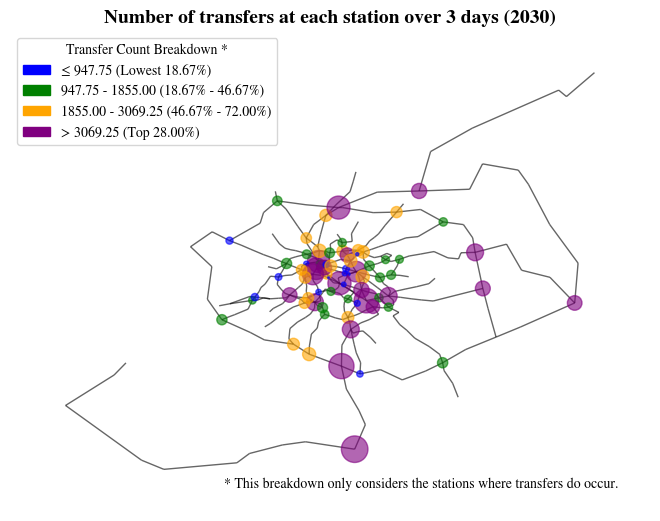

In [ ]:
# The result shows the number of people transferring at each station

# Get transfer counts result values
transfer_counts_result_values = list(transfer_counts_result.values())

# Use the boundaries from the 2021 graph
q1 = 947.75
q2 = 1855.00
q3 = 3069.25

group1_count = sum(1 for value in transfer_counts_result_values if value <= q1)
group2_count = sum(1 for value in transfer_counts_result_values if q1 < value <= q2)
group3_count = sum(1 for value in transfer_counts_result_values if q2 < value <= q3)
group4_count = sum(1 for value in transfer_counts_result_values if value > q3)

total_stations = len(transfer_counts_result_values)

group1_percentage = (group1_count / total_stations) * 100
group2_percentage = (group2_count / total_stations) * 100
group3_percentage = (group3_count / total_stations) * 100
group4_percentage = (group4_count / total_stations) * 100

print(f"Percentage of stations in Group 1 (<= {q1:.2f}): {group1_percentage:.2f}%")
print(f"Percentage of stations in Group 2 ({q1:.2f} < x <= {q2:.2f}): {group2_percentage:.2f}%")
print(f"Percentage of stations in Group 3 ({q2:.2f} < x <= {q3:.2f}): {group3_percentage:.2f}%")
print(f"Percentage of stations in Group 4 (> {q3:.2f}): {group4_percentage:.2f}%")

# Function to assign colors based on quartiles
def assign_color(value):
    if value <= q1:
        return "blue"
    elif value <= q2:
        return "green"
    elif value <= q3:
        return "orange"
    else:
        return "purple"

# Assign colors to each node
node_colors = [assign_color(transfer_counts_result.get(station, 0)) for station in G.nodes()]

# Get node sizes based on transfer_counts_result
node_sizes = [transfer_counts_result.get(station, 0) * 0.03 for station in G.nodes()]  # Scale size for better visualization

# Get node positions from station_coordinates
pos = {station: station_coordinates[station] for station in G.nodes()}

# Draw the graph with node sizes and positions
nx.draw(G, pos=pos, with_labels=False, node_size=node_sizes, node_color = node_colors, alpha = 0.6)

# Create a legend
legend_patches = [
    mpatches.Patch(color="blue", label=f"≤ {q1:.2f} (Lowest {group1_percentage:.2f}%)"),
    mpatches.Patch(color="green", label=f"{q1:.2f} - {q2:.2f} ({group1_percentage:.2f}% - {(group1_percentage + group2_percentage):.2f}%)"),
    mpatches.Patch(color="orange", label=f"{q2:.2f} - {q3:.2f} ({(group1_percentage + group2_percentage):.2f}% - {(group1_percentage + group2_percentage + group3_percentage):.2f}%)"),
    mpatches.Patch(color="purple", label=f"> {q3:.2f} (Top {group4_percentage:.2f}%)"),
]

plt.legend(handles=legend_patches, title="Transfer Count Breakdown *", loc="upper left")

# Add a title
plt.title("Number of transfers at each station over 3 days (2030)", fontsize=14, fontweight="bold")
plt.text(0.95, 0.05, "* This breakdown only considers the stations where transfers do occur.",
         transform=plt.gca().transAxes, ha='right', fontsize=10)  # Add the note

plt.savefig("2030_transfers_at_each_station.pdf", bbox_inches='tight')

Percentage of stations in Group 1 (<= 373.00): 16.58%
Percentage of stations in Group 2 (373.00 < x <= 442.50): 17.39%
Percentage of stations in Group 3 (442.50 < x <= 597.00): 30.43%
Percentage of stations in Group 4 (> 597.00): 35.60%
The quartiles are as follows: 373.00 442.50 597.00


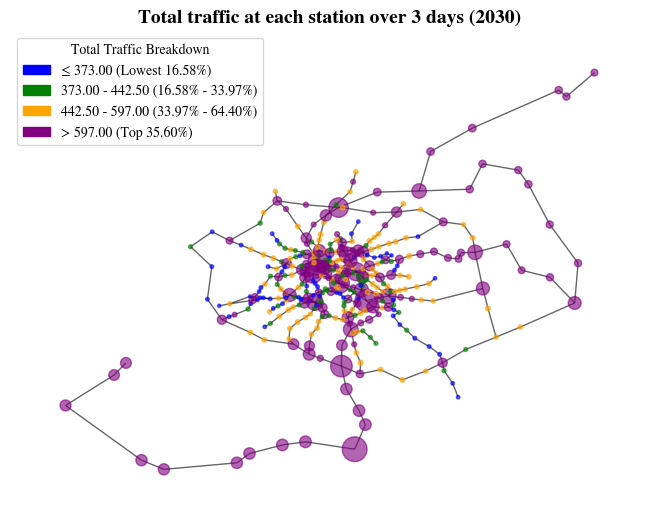

In [ ]:
# Get Total Traffic values
total_traffic_values = df_congestion_2030['Total Traffic'].tolist()

# Compute the boundaries from the 2021 graph
q1 = 373.00
q2 = 442.50
q3 = 597.00

group1_count = sum(1 for value in total_traffic_values if value <= q1)
group2_count = sum(1 for value in total_traffic_values if q1 < value <= q2)
group3_count = sum(1 for value in total_traffic_values if q2 < value <= q3)
group4_count = sum(1 for value in total_traffic_values if value > q3)

total_stations = len(total_traffic_values)

group1_percentage = (group1_count / total_stations) * 100
group2_percentage = (group2_count / total_stations) * 100
group3_percentage = (group3_count / total_stations) * 100
group4_percentage = (group4_count / total_stations) * 100

print(f"Percentage of stations in Group 1 (<= {q1:.2f}): {group1_percentage:.2f}%")
print(f"Percentage of stations in Group 2 ({q1:.2f} < x <= {q2:.2f}): {group2_percentage:.2f}%")
print(f"Percentage of stations in Group 3 ({q2:.2f} < x <= {q3:.2f}): {group3_percentage:.2f}%")
print(f"Percentage of stations in Group 4 (> {q3:.2f}): {group4_percentage:.2f}%")

# Function to assign colors based on quartiles
def assign_color(value):
    if value <= q1:
        return "blue"
    elif value <= q2:
        return "green"
    elif value <= q3:
        return "orange"
    else:
        return "purple"

# Assign colors to each node
node_colors = [assign_color(traffic) for traffic in total_traffic_values]

# Get node sizes based on Total Traffic
node_sizes = [traffic * 0.02 for traffic in total_traffic_values]  # Scale size for better visualization

# Get node positions from station_coordinates
pos = {station: station_coordinates[station] for station in df_congestion_2030['Station'].tolist()}

# Draw the graph with node sizes and positions
nx.draw(G, pos=pos, with_labels=False, node_size=node_sizes, node_color=node_colors, alpha=0.6, font_family='STIXGeneral')

# Create a legend
legend_patches = [
    mpatches.Patch(color="blue", label=f"≤ {q1:.2f} (Lowest {group1_percentage:.2f}%)"),
    mpatches.Patch(color="green", label=f"{q1:.2f} - {q2:.2f} ({group1_percentage:.2f}% - {(group1_percentage + group2_percentage):.2f}%)"),
    mpatches.Patch(color="orange", label=f"{q2:.2f} - {q3:.2f} ({(group1_percentage + group2_percentage):.2f}% - {(group1_percentage + group2_percentage + group3_percentage):.2f}%)"),
    mpatches.Patch(color="purple", label=f"> {q3:.2f} (Top {group4_percentage:.2f}%)"),
]

plt.legend(handles=legend_patches, title="Total Traffic Breakdown", loc="upper left")

# Add a title
plt.title("Total traffic at each station over 3 days (2030)", fontsize=14, fontweight="bold")

print("The quartiles are as follows:", f"{q1:.2f}", f"{q2:.2f}", f"{q3:.2f}")

plt.savefig("2030_total_traffic_per_station.pdf", bbox_inches='tight')

Percentage of stations in Group 1 (<= 1.69): 36.68%
Percentage of stations in Group 2 (1.69 < x <= 1.95): 24.46%
Percentage of stations in Group 3 (1.95 < x <= 2.23): 19.02%
Percentage of stations in Group 4 (> 2.23): 19.84%


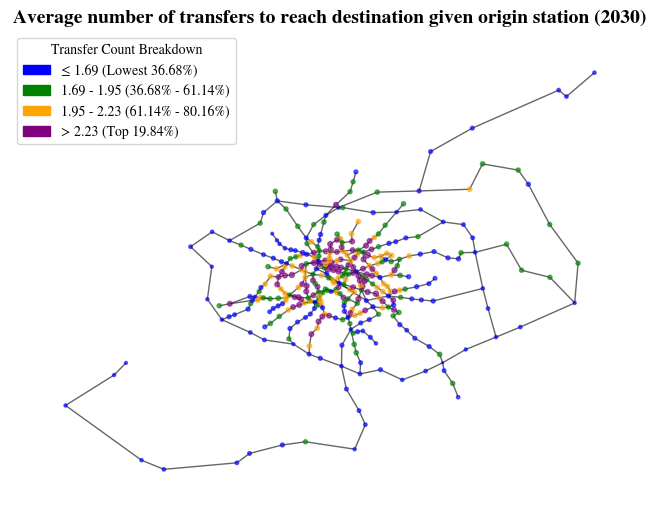

In [ ]:
# The average number of transfers a person who starts at each station needs to make to get to their destination

# Get transfer counts result values
avg_transfers_result_values = list(avg_transfers_result.values())

# Use the boundaries from the 2021 graph
q1 = 1.69
q2 = 1.95
q3 = 2.23

group1_count = sum(1 for value in avg_transfers_result_values if value <= q1)
group2_count = sum(1 for value in avg_transfers_result_values if q1 < value <= q2)
group3_count = sum(1 for value in avg_transfers_result_values if q2 < value <= q3)
group4_count = sum(1 for value in avg_transfers_result_values if value > q3)

total_stations = len(avg_transfers_result_values)

group1_percentage = (group1_count / total_stations) * 100
group2_percentage = (group2_count / total_stations) * 100
group3_percentage = (group3_count / total_stations) * 100
group4_percentage = (group4_count / total_stations) * 100

print(f"Percentage of stations in Group 1 (<= {q1:.2f}): {group1_percentage:.2f}%")
print(f"Percentage of stations in Group 2 ({q1:.2f} < x <= {q2:.2f}): {group2_percentage:.2f}%")
print(f"Percentage of stations in Group 3 ({q2:.2f} < x <= {q3:.2f}): {group3_percentage:.2f}%")
print(f"Percentage of stations in Group 4 (> {q3:.2f}): {group4_percentage:.2f}%")

# Function to assign colors based on quartiles
def assign_color(value):
    if value <= q1:
        return "blue"
    elif value <= q2:
        return "green"
    elif value <= q3:
        return "orange"
    else:
        return "purple"

# Assign colors to each node
node_colors = [assign_color(avg_transfers_result.get(station, 0)) for station in G.nodes()]

# Get node sizes based on transfer_counts_result
node_sizes = [avg_transfers_result.get(station, 0) * 5 for station in G.nodes()]  # Scale size for better visualization

# Get node positions from station_coordinates
pos = {station: station_coordinates[station] for station in G.nodes()}

# Draw the graph with node sizes and positions
nx.draw(G, pos=pos, with_labels=False, node_size=node_sizes, node_color = node_colors, font_family = 'STIXGeneral', alpha = 0.6)

# Create a legend
legend_patches = [
    mpatches.Patch(color="blue", label=f"≤ {q1:.2f} (Lowest {group1_percentage:.2f}%)"),
    mpatches.Patch(color="green", label=f"{q1:.2f} - {q2:.2f} ({group1_percentage:.2f}% - {(group1_percentage + group2_percentage):.2f}%)"),
    mpatches.Patch(color="orange", label=f"{q2:.2f} - {q3:.2f} ({(group1_percentage + group2_percentage):.2f}% - {(group1_percentage + group2_percentage + group3_percentage):.2f}%)"),
    mpatches.Patch(color="purple", label=f"> {q3:.2f} (Top {group4_percentage:.2f}%)"),
]

plt.legend(handles=legend_patches, title="Transfer Count Breakdown", loc="upper left")

# Add a title
plt.title("Average number of transfers to reach destination given origin station (2030)", fontsize=14, fontweight="bold")

plt.savefig("avg_transfers_result_graph.pdf", bbox_inches='tight')

## **Understanding the Effect on the 2021 Stations**

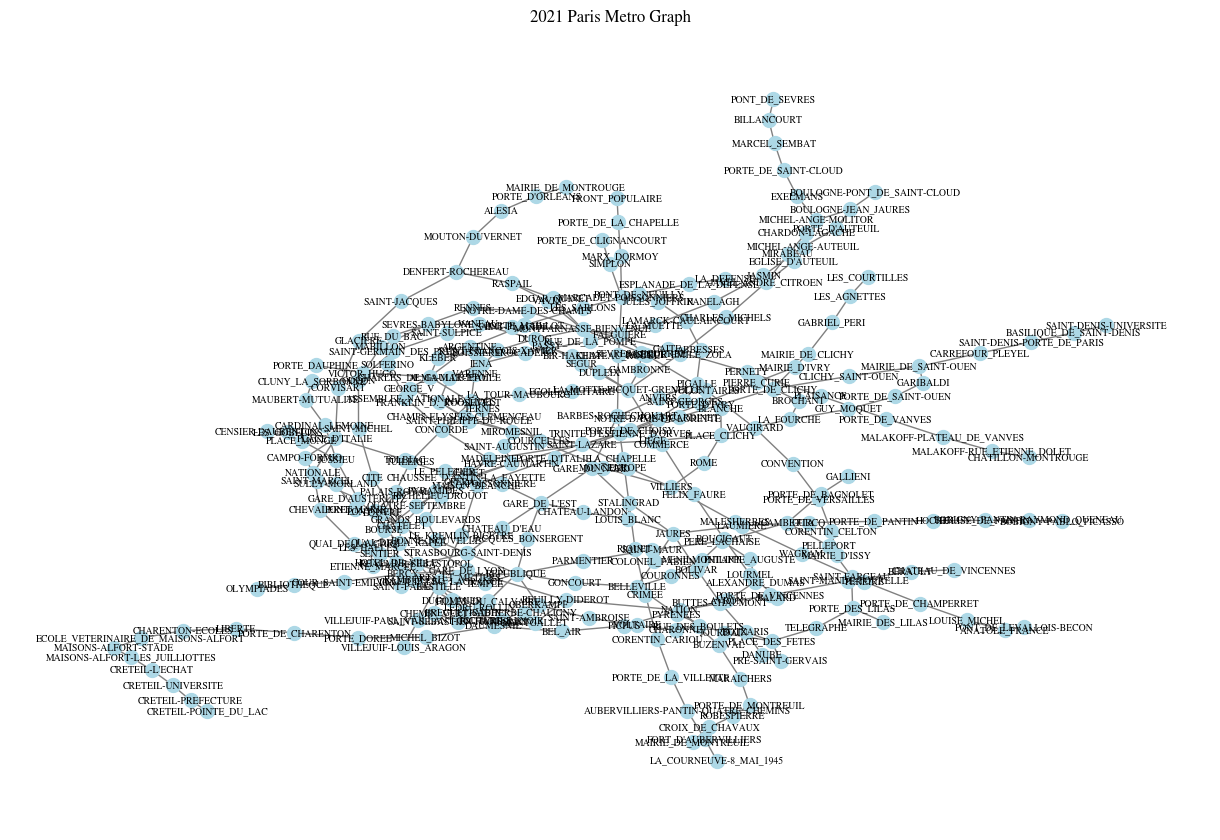

In [ ]:
# Initialize an empty graph
G_2021 = nx.Graph()

# Read the graph file manually and parse edges
with open("graph_all_lines.txt", "r", encoding="utf-8") as file:
    for line in file:
        parts = line.strip().split(" ", 2)  # Split into first two parts + label dictionary
        if len(parts) == 3:
            node1, node2, attr_str = parts
            try:
                # Convert the attribute string into a dictionary
                attr_dict = eval(attr_str)  # Be cautious with eval() if the file is untrusted
                G_2021.add_edge(node1, node2, **attr_dict)
            except SyntaxError:
                print(f"Skipping invalid line: {line.strip()}")

# Add traversal time as an edge attribute based on the line number
for u, v, data in G_2021.edges(data=True):
    line = data.get("label")
    if line in line_to_time:
        G_2021[u][v]["time"] = line_to_time[line]  # Assign travel time

# Draw the graph
plt.figure(figsize=(12, 8))
nx.draw(G_2021, with_labels=True, node_color="lightblue", edge_color="gray", node_size=100, font_size=7, font_family = 'STIXGeneral')
plt.title("2021 Paris Metro Graph")
plt.show()

In [ ]:
df_2021 = pd.read_csv("all_2021_data.csv")
# Replace spaces with underscores in station names
df_2021["Station"] = df_2021["Station"].str.replace(" ", "_")

# Display the updated DataFrame
display(df_2021)

,ID,Network,Station,Traffic,First Line,Second Line,Third Line,Fourth Line,Fifth Line,Arrondissement for Paris,latitude,longitude
0,1,Metro,GARE_DU_NORD,34503097,4,5,NaN,NaN,NaN,10.0,48.880556,2.355000
1,2,Metro,SAINT-LAZARE,33128384,3,9,12,13.0,14.0,8.0,48.875490,2.326640
2,3,Metro,GARE_DE_LYON,28640475,1,14,A,NaN,NaN,12.0,48.844722,2.373889
3,4,Metro,MONTPARNASSE-BIENVENUE,20407224,4,6,12,13.0,NaN,14.0,48.843466,2.323072
4,5,Metro,GARE_DE_L'EST,15538471,4,5,7,NaN,NaN,10.0,48.876111,2.358333
...,...,...,...,...,...,...,...,...,...,...,...,...
299,301,Metro,BOLIVAR,367598,7bis,NaN,NaN,NaN,NaN,19.0,48.880502,2.374922
300,302,Metro,BUTTES-CHAUMONT,358301,7bis,NaN,NaN,NaN,NaN,19.0,48.878500,2.381772
301,303,Metro,PRE-SAINT-GERVAIS,282626,7bis,NaN,NaN,NaN,NaN,19.0,48.880250,2.398910
302,304,Metro,PELLEPORT,229524,3bis,NaN,NaN,NaN,NaN,20.0,48.868671,2.401752


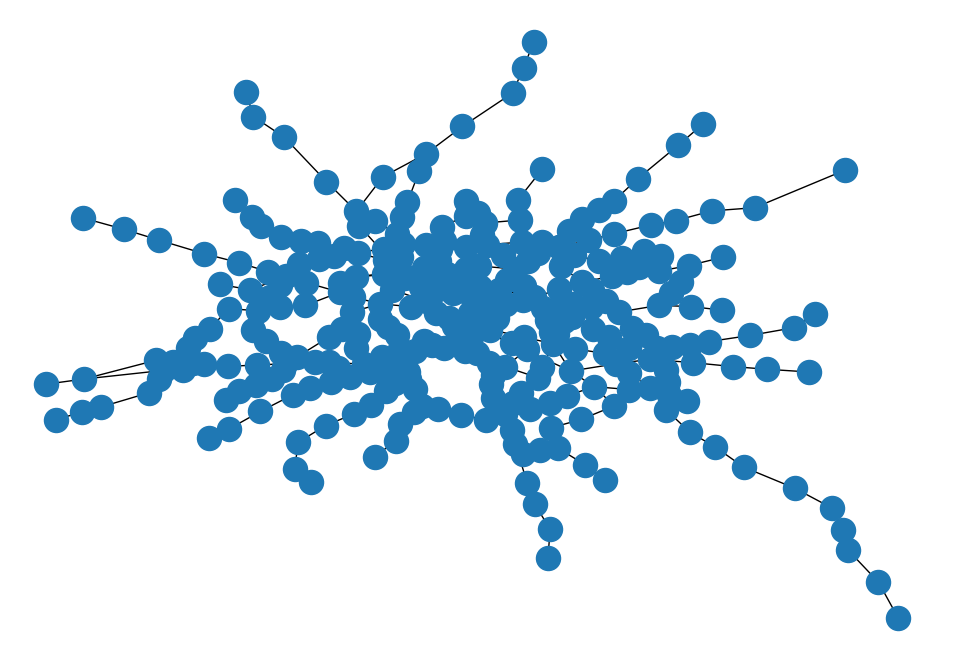

# of stations: 304


In [ ]:
# Create a dictionary where keys are station names and values are (latitude, longitude) tuples
station_coordinates_2021 = {}
for index, row in df_2021.iterrows():
    station_coordinates_2021[row['Station']] = (row['longitude'], row['latitude'])

plt.figure(figsize=(12, 8))  # Adjust the size as needed
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)

# Extract longitude and latitude values from df1 to lists
longitude = df_2021['longitude'].tolist()
latitude = df_2021['latitude'].tolist()

plt.xlim([min(longitude) - 0.01, max(longitude) + 0.02])
plt.ylim([min(latitude) - 0.01 , max(latitude) + 0.01])
nx.draw(G_2021, station_coordinates_2021)
plt.show()  # Display the visualization

print("# of stations:", G_2021.number_of_nodes())

Percentage of stations in Group 1 (<= 1.69): 27.96%
Percentage of stations in Group 2 (1.69 < x <= 1.95): 25.66%
Percentage of stations in Group 3 (1.95 < x <= 2.23): 22.37%
Percentage of stations in Group 4 (> 2.23): 24.01%


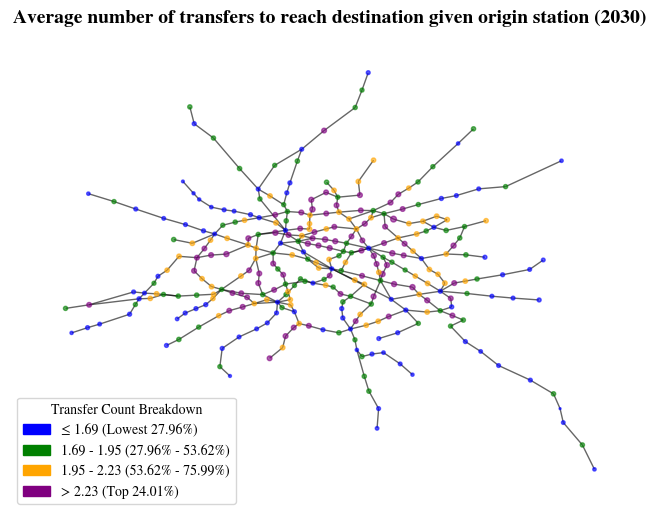

In [ ]:
# APPLY THE ABOVE TRANSFER METRIC ON ONLY THE STATIONS THAT WERE PART OF THE 2021 NETWORK

# The average number of transfers a person who starts at each station needs to make to get to their destination

# Get the list of stations in df_2021
stations_2021 = df_2021['Station'].tolist()

# Create a new dictionary with only the relevant stations
avg_transfers_result_2021 = {
    station: avg_transfers_result[station]
    for station in stations_2021 if station in avg_transfers_result
}

# Get transfer counts result values
avg_transfers_result_values_2021 = list(avg_transfers_result_2021.values())

# Use the boundaries from the 2021 graph
q1 = 1.69
q2 = 1.95
q3 = 2.23

group1_count = sum(1 for value in avg_transfers_result_values_2021 if value <= q1)
group2_count = sum(1 for value in avg_transfers_result_values_2021 if q1 < value <= q2)
group3_count = sum(1 for value in avg_transfers_result_values_2021 if q2 < value <= q3)
group4_count = sum(1 for value in avg_transfers_result_values_2021 if value > q3)

total_stations_2021 = len(avg_transfers_result_values_2021)

group1_percentage = (group1_count / total_stations_2021) * 100
group2_percentage = (group2_count / total_stations_2021) * 100
group3_percentage = (group3_count / total_stations_2021) * 100
group4_percentage = (group4_count / total_stations_2021) * 100

print(f"Percentage of stations in Group 1 (<= {q1:.2f}): {group1_percentage:.2f}%")
print(f"Percentage of stations in Group 2 ({q1:.2f} < x <= {q2:.2f}): {group2_percentage:.2f}%")
print(f"Percentage of stations in Group 3 ({q2:.2f} < x <= {q3:.2f}): {group3_percentage:.2f}%")
print(f"Percentage of stations in Group 4 (> {q3:.2f}): {group4_percentage:.2f}%")

# Function to assign colors based on quartiles
def assign_color(value):
    if value <= q1:
        return "blue"
    elif value <= q2:
        return "green"
    elif value <= q3:
        return "orange"
    else:
        return "purple"

# Assign colors to each node
node_colors = [assign_color(avg_transfers_result_2021.get(station, 0)) for station in G_2021.nodes()]

# Get node sizes based on transfer_counts_result
node_sizes = [avg_transfers_result_2021.get(station, 0) * 5 for station in G_2021.nodes()]  # Scale size for better visualization

# Get node positions from station_coordinates
pos_2021 = {station: station_coordinates_2021[station] for station in G_2021.nodes()}

# Draw the graph with node sizes and positions
nx.draw(G_2021, pos=pos_2021, with_labels=False, node_size=node_sizes, node_color = node_colors, font_family = 'STIXGeneral', alpha = 0.6)

# Create a legend
legend_patches = [
    mpatches.Patch(color="blue", label=f"≤ {q1:.2f} (Lowest {group1_percentage:.2f}%)"),
    mpatches.Patch(color="green", label=f"{q1:.2f} - {q2:.2f} ({group1_percentage:.2f}% - {(group1_percentage + group2_percentage):.2f}%)"),
    mpatches.Patch(color="orange", label=f"{q2:.2f} - {q3:.2f} ({(group1_percentage + group2_percentage):.2f}% - {(group1_percentage + group2_percentage + group3_percentage):.2f}%)"),
    mpatches.Patch(color="purple", label=f"> {q3:.2f} (Top {group4_percentage:.2f}%)"),
]

plt.legend(handles=legend_patches, title="Transfer Count Breakdown", loc="lower left")

plt.title("Average number of transfers to reach destination given origin station (2030)", fontweight="bold", fontsize=14)

plt.savefig("2030_center_avg_transfers_result_graph.pdf", bbox_inches='tight')

## **Priority Stations Analysis**

In [ ]:
priority_stations = df_priority_stations["Priority Stations"].tolist()

filtered_df = df_results[df_results["origin"].isin(priority_stations)]
average_path_time_priority = filtered_df["path_time"].mean()

print(f"Average Path Time for Priority Stations: {average_path_time_priority}")

display(filtered_df)


Average Path Time for Priority Stations: 23.93746906057309


,person_id,path,path_time,origin,destination,transfer_stations
1035,1036,"[PARMENTIER, REPUBLIQUE, JACQUES_BONSERGENT, G...",12.268,PARMENTIER,STALINGRAD,[REPUBLIQUE]
1036,1037,"[PARMENTIER, REPUBLIQUE, ARTS_ET_METIERS, RAMB...",34.412,PARMENTIER,NOTRE-DAME-DES-CHAMPS,"[REPUBLIQUE, CHATELET, ODEON, SEVRES-BABYLONE]"
1037,1038,"[PARMENTIER, REPUBLIQUE, STRASBOURG-SAINT-DENI...",12.931,PARMENTIER,CHATEAU_D'EAU,"[REPUBLIQUE, STRASBOURG-SAINT-DENIS]"
1038,1039,"[PARMENTIER, SAINT-MAUR, PERE_LACHAISE, GAMBET...",5.168,PARMENTIER,PORTE_DE_BAGNOLET,[]
1039,1040,"[PARMENTIER, REPUBLIQUE, OBERKAMPF, RICHARD_LE...",18.157,PARMENTIER,QUAI_DE_LA_RAPEE,"[REPUBLIQUE, OBERKAMPF]"
...,...,...,...,...,...,...
124679,124680,"[LA_COURNEUVE-8_MAI_1945, FORT_D'AUBERVILLIERS...",21.767,LA_COURNEUVE-8_MAI_1945,PORTE_DE_CLICHY,"[FORT_D'AUBERVILLIERS, SAINT-DENIS-PLEYEL]"
124680,124681,"[LA_COURNEUVE-8_MAI_1945, FORT_D'AUBERVILLIERS...",9.386,LA_COURNEUVE-8_MAI_1945,BOBIGNY-PABLO_PICASSO,[FORT_D'AUBERVILLIERS]
124681,124682,"[LA_COURNEUVE-8_MAI_1945, FORT_D'AUBERVILLIERS...",55.192,LA_COURNEUVE-8_MAI_1945,BIR-HAKEIM,"[FORT_D'AUBERVILLIERS, SAINT-DENIS-PLEYEL, SAI..."
124682,124683,"[LA_COURNEUVE-8_MAI_1945, FORT_D'AUBERVILLIERS...",21.857,LA_COURNEUVE-8_MAI_1945,NEUILLY-LES_FAUVETTES,"[FORT_D'AUBERVILLIERS, ROSNY-BOIS-PERRIER]"


Percentage of stations in Group 1 (<= 1.59): 39.78%
Percentage of stations in Group 2 (1.59 < x <= 1.91): 30.11%
Percentage of stations in Group 3 (1.91 < x <= 2.12): 16.13%
Percentage of stations in Group 4 (> 2.12): 13.98%
The quartiles are as follows: 1.59 1.91 2.12


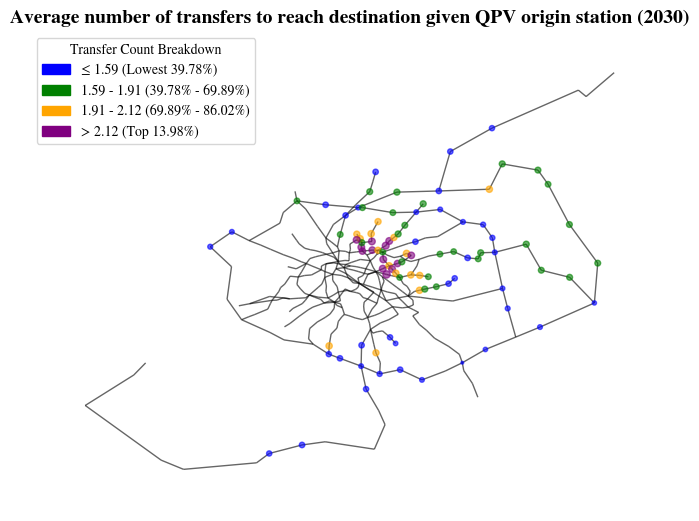

In [ ]:
# For Priority Stations: The average number of transfers a person who starts at each station needs to make to get to their destination

priority_stations = df_priority_stations["Priority Stations"].tolist()

# Create a new dictionary with only the relevant stations
avg_transfers_result_priority = {
    station: avg_transfers_result[station]
    for station in priority_stations if station in avg_transfers_result
}

# Get transfer counts result values
avg_transfers_result_values_priority = list(avg_transfers_result_priority.values())

# Use the boundaries from the 2021 graph
q1 = 1.59
q2 = 1.91
q3 = 2.12

group1_count = sum(1 for value in avg_transfers_result_values_priority if value <= q1)
group2_count = sum(1 for value in avg_transfers_result_values_priority if q1 < value <= q2)
group3_count = sum(1 for value in avg_transfers_result_values_priority if q2 < value <= q3)
group4_count = sum(1 for value in avg_transfers_result_values_priority if value > q3)

total_stations = len(avg_transfers_result_values_priority)

group1_percentage = (group1_count / total_stations) * 100
group2_percentage = (group2_count / total_stations) * 100
group3_percentage = (group3_count / total_stations) * 100
group4_percentage = (group4_count / total_stations) * 100

print(f"Percentage of stations in Group 1 (<= {q1:.2f}): {group1_percentage:.2f}%")
print(f"Percentage of stations in Group 2 ({q1:.2f} < x <= {q2:.2f}): {group2_percentage:.2f}%")
print(f"Percentage of stations in Group 3 ({q2:.2f} < x <= {q3:.2f}): {group3_percentage:.2f}%")
print(f"Percentage of stations in Group 4 (> {q3:.2f}): {group4_percentage:.2f}%")

# Function to assign colors based on quartiles
def assign_color(value):
    if value <= q1:
        return "blue"
    elif value <= q2:
        return "green"
    elif value <= q3:
        return "orange"
    else:
        return "purple"

# Function to assign colors based on quartiles
def assign_color(value):
    if value <= q1:
        return "blue"
    elif value <= q2:
        return "green"
    elif value <= q3:
        return "orange"
    else:
        return "purple"

# Assign colors to each node
node_colors = [assign_color(avg_transfers_result_priority.get(station, 0)) for station in G.nodes()]

# Get node sizes based on transfer_counts_result
node_sizes = [avg_transfers_result_priority.get(station, 0) * 10 for station in G.nodes()]  # Scale size for better visualization

# Get node positions from station_coordinates
pos = {station: station_coordinates[station] for station in G.nodes()}

# Draw the graph with node sizes and positions
nx.draw(G, pos=pos, with_labels=False, node_size=node_sizes, node_color = node_colors, alpha = 0.6, font_family = 'STIXGeneral')

# Create a legend
legend_patches = [
    mpatches.Patch(color="blue", label=f"≤ {q1:.2f} (Lowest {group1_percentage:.2f}%)"),
    mpatches.Patch(color="green", label=f"{q1:.2f} - {q2:.2f} ({group1_percentage:.2f}% - {(group1_percentage + group2_percentage):.2f}%)"),
    mpatches.Patch(color="orange", label=f"{q2:.2f} - {q3:.2f} ({(group1_percentage + group2_percentage):.2f}% - {(group1_percentage + group2_percentage + group3_percentage):.2f}%)"),
    mpatches.Patch(color="purple", label=f"> {q3:.2f} (Top {group4_percentage:.2f}%)"),
]

plt.legend(handles=legend_patches, title="Transfer Count Breakdown", loc="upper left")

# Add a title
plt.title("Average number of transfers to reach destination given QPV origin station (2030)", fontsize=14, fontweight="bold")

print("The quartiles are as follows:", f"{q1:.2f}", f"{q2:.2f}", f"{q3:.2f}")

plt.savefig("2030_QPV_avg_transfers_result_graph.pdf", bbox_inches='tight')

## **Analysis of the Results of the Simulation**

In [ ]:
# Cleaning up df_2030

# Update "Third Line" for GARE_DE_LYON to NaN
df_2030.loc[df_2030["Station"] == "GARE_DE_LYON", "Third Line"] = np.nan
# Update "Fourth Line" for NEUILLY-HOPITAUX to NaN
df_2030.loc[df_2030["Station"] == "NEUILLY-HOPITAUX", "Fourth Line"] = np.nan
# Update "Fourth Line" for PARC_DES_EXPOSITIONS to NaN
df_2030.loc[df_2030["Station"] == "PARC_DES_EXPOSITIONS", "Fourth Line"] = np.nan

display(df_2030)

,ID,Station,2021 Traffic,2030 Traffic,Latitude,Longitude,First Line,Second Line,Third Line,Fourth Line,Fifth Line,Station Capacity
0,1.0,GARE_DU_NORD,34503097.0,34503097,48.880556,2.355000,4,5,NaN,NaN,NaN,69006194.0
1,2.0,SAINT-LAZARE,33128384.0,33128384,48.875490,2.326640,3,9,12,13,14.0,66256768.0
2,3.0,GARE_DE_LYON,28640475.0,28640475,48.844722,2.373889,1,14,NaN,NaN,NaN,57280950.0
3,4.0,MONTPARNASSE-BIENVENUE,20407224.0,20407224,48.843466,2.323072,4,6,12,13,NaN,40814448.0
4,5.0,GARE_DE_L'EST,15538471.0,15538471,48.876111,2.358333,4,5,7,NaN,NaN,31076942.0
...,...,...,...,...,...,...,...,...,...,...,...,...
363,364.0,PALAISEAU,NaN,26563097,48.717388,2.245835,18,NaN,NaN,NaN,NaN,0.0
364,365.0,MASSY-PALAISEAU,NaN,26563097,48.724722,2.258333,18,NaN,NaN,NaN,NaN,0.0
365,366.0,MASSY_OPERA,NaN,26563097,48.731402,2.290821,18,NaN,NaN,NaN,NaN,0.0
366,367.0,ANTONYPOLE,NaN,26563097,48.733904,2.313677,18,NaN,NaN,NaN,NaN,0.0


In [ ]:
# metro_lines was defined earlier and it might be useful later
print(metro_lines)
for item in metro_lines:
    print(type(item))

{1, 2, 3, 4, 5, 6, 7, 8, 9, 7.5, 11, 12, 13, 14, 10, 3.5, 15, 16, 17, 18}
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'float'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'float'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>


In [ ]:
# List of columns representing Metro lines
line_columns = ["First Line", "Second Line", "Third Line", "Fourth Line", "Fifth Line"]

# Count the number of Metro lines each station is on (excluding NaNs)
df_2030["Line Count"] = df_2030[line_columns].notna().sum(axis=1)

# Explode the DataFrame so that each row corresponds to a single Metro line
df_lines = df_2030.melt(id_vars=["2030 Traffic", "Line Count"], value_vars=line_columns, value_name="Metro Line").dropna()
df_lines["Metro Line"] = df_lines["Metro Line"].astype(str).str.replace(".0", "", regex=False)
display(df_lines)

# for value in df_lines["Metro Line"]:
  # print(f"The type of {value} is: {type(value)}")

,2030 Traffic,Line Count,variable,Metro Line
0,34503097,2,First Line,4
1,33128384,5,First Line,3
2,28640475,2,First Line,1
3,20407224,4,First Line,4
4,15538471,3,First Line,4
...,...,...,...,...
1123,6050797,4,Fourth Line,9
1418,2122112,4,Fourth Line,17
1473,33128384,5,Fifth Line,14
1478,11079708,5,Fifth Line,11


In [ ]:
# Distribute traffic by the number of lines at each station
df_lines["Adjusted Traffic"] = df_lines["2030 Traffic"] / df_lines["Line Count"]

# Group by Metro Line and sum the adjusted traffic
traffic_by_line = df_lines.groupby("Metro Line")["Adjusted Traffic"].sum().reset_index()

# Rename column for clarity
traffic_by_line.rename(columns={"Adjusted Traffic": "Total Annual 2030 Traffic"}, inplace=True)

# Display the result
print(traffic_by_line)

   Metro Line  Total Annual 2030 Traffic
0           1               7.799481e+07
1          10               3.058428e+07
2          11               1.195350e+08
3          12               5.885409e+07
4          13               7.140078e+07
5          14               1.795071e+08
6          15               3.875955e+07
7          16               7.941620e+07
8          17               6.762825e+07
9          18               2.523494e+08
10          2               5.526142e+07
11          3               5.392825e+07
12       3bis               4.652652e+06
13          4               1.185825e+08
14          5               6.296674e+07
15          6               5.164404e+07
16          7               7.025397e+07
17       7bis               5.363222e+06
18          8               6.371279e+07
19          9               8.378207e+07


In [ ]:
# Assuming 'traffic_by_line_data' is your list of dictionaries
df_traffic_by_line = pd.DataFrame(traffic_by_line)

# Group by 'Line' and sum 'Passenger_Count'
df_traffic_by_line = df_traffic_by_line.groupby('Metro Line')['Total Annual 2030 Traffic'].sum().reset_index()

# Display the DataFrame
display(df_traffic_by_line)

# Calculate daily traffic
df_traffic_by_line["Total Daily 2030 Traffic"] = df_traffic_by_line["Total Annual 2030 Traffic"] / 365

# Calculate daily traffic
df_traffic_by_line["Total Daily 2030 Traffic / 100"] = df_traffic_by_line["Total Daily 2030 Traffic"] / 100

# Calculate daily traffic
df_traffic_by_line["Total Daily 2030 Traffic / 200"] = df_traffic_by_line["Total Daily 2030 Traffic"] / 200

# Display the DataFrame
display(df_traffic_by_line)
df_traffic_by_line.to_csv('df_line_data_2030.csv', index=False)

,Metro Line,Total Annual 2030 Traffic
0,1,7.799481e+07
1,10,3.058428e+07
2,11,1.195350e+08
3,12,5.885409e+07
4,13,7.140078e+07
5,14,1.795071e+08
6,15,3.875955e+07
7,16,7.941620e+07
8,17,6.762825e+07
9,18,2.523494e+08


,Metro Line,Total Annual 2030 Traffic,Total Daily 2030 Traffic,Total Daily 2030 Traffic / 100,Total Daily 2030 Traffic / 200
0,1,7.799481e+07,213684.408813,2136.844088,1068.422044
1,10,3.058428e+07,83792.544292,837.925443,418.962721
2,11,1.195350e+08,327493.252694,3274.932527,1637.466263
3,12,5.885409e+07,161244.071142,1612.440711,806.220356
4,13,7.140078e+07,195618.562466,1956.185625,978.092812
5,14,1.795071e+08,491800.370137,4918.003701,2459.001851
6,15,3.875955e+07,106190.544749,1061.905447,530.952724
7,16,7.941620e+07,217578.639269,2175.786393,1087.893196
8,17,6.762825e+07,185282.865753,1852.828658,926.414329
9,18,2.523494e+08,691368.278082,6913.682781,3456.841390
